# 데이터 이해하기

In [329]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

import statsmodels.api as sm  # 로지스틱함수
import scipy.stats as spst  # 카이제곱검정

In [330]:
path = 'train.csv'
org_data = pd.read_csv(path)
data = org_data.copy()
data.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [332]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 데이터 전처리

### 이상치 제거

In [333]:
# 변수 1~16 이상치 제거
data = data[data['LotFrontage'] < 200]
data = data[data['LotArea'] < 100000]

# 변수 33~48 이상치 제거
data = data.loc[data['BsmtFinSF1'] <= 3000].reset_index(drop=True)
data = data.loc[data['BsmtFinSF2'] < 1400].reset_index(drop=True)
data = data.loc[data['BsmtUnfSF'] < 2300].reset_index(drop=True)
data = data.loc[data['TotalBsmtSF'] < 3000].reset_index(drop=True)
data = data.loc[data['1stFlrSF'] < 2898].reset_index(drop=True)
data = data.loc[data['2ndFlrSF'] < 2000].reset_index(drop=True)
data = data.loc[data['GrLivArea'] < 4000].reset_index(drop=True)

# 변수 49~64 이상치 제거하기
data = data[data['BedroomAbvGr']!=8]
data = data[data['KitchenAbvGr']!=0]
data = data[data['Functional']!='Sev']

# 변수 65~80 이상치 제거
data = data[data['WoodDeckSF']<800]
data = data[data['OpenPorchSF']<500]
data = data[data['EnclosedPorch']<500]
data = data[data['3SsnPorch']<500]
data = data[data['3SsnPorch']<16000].reset_index(drop=True)

### x와 y 분리

In [334]:
target = 'SalePrice'

x = data.drop(target, axis=1)
y = data[target]

### train, val 데이터 셋 나누기

In [335]:
# train, val 셋 나누기 위한 라이브러리 불러오기
from sklearn.model_selection import train_test_split

In [336]:
# train, val 셋으로 데이터 분할
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=2022)

### 변수 1~16 전처리

In [337]:
# NaN 조치
fre_D = x_train['LotFrontage'].value_counts().idxmax()  # 최빈값
x_train['LotFrontage'].fillna(fre_D, inplace=True)

# # 이상치 제거
# data = data[data['LotFrontage'] < 200]
# data = data[data['LotArea'] < 100000]

# 열 제거 : nan값 비중 매우 높음
x_train = x_train.drop('Alley', axis=1)
x_train = x_train.drop('Utilities', axis=1)

### 변수 17~32 전처리

In [338]:
# NaN 조치
x_train['MasVnrArea'].fillna(0, inplace=True)
x_train['MasVnrType'].fillna('None', inplace=True)
x_train['BsmtQual'].fillna('Na', inplace=True)
x_train['BsmtCond'].fillna('Na', inplace=True)
x_train['BsmtExposure'].fillna('Na', inplace=True)

### 변수 33~48 전처리

In [339]:
# NaN 조치
## No basement라는 의미로 NA로 채움
x_train['BsmtFinType1'].fillna("NA", inplace = True)
x_train['BsmtFinType2'].fillna("NA", inplace = True)

## 최빈값으로 채움
x_train['Electrical'].fillna(x['Electrical'].mode()[0], inplace = True)

# # 이상치 제거
# data = data.loc[data['BsmtFinSF1'] <= 3000].reset_index(drop=True)
# data = data.loc[data['BsmtFinSF2'] < 1400].reset_index(drop=True)
# data = data.loc[data['BsmtUnfSF'] < 2300].reset_index(drop=True)
# data = data.loc[data['TotalBsmtSF'] < 3000].reset_index(drop=True)
# data = data.loc[data['1stFlrSF'] < 2898].reset_index(drop=True)
# data = data.loc[data['2ndFlrSF'] < 2000].reset_index(drop=True)
# data = data.loc[data['GrLivArea'] < 4000].reset_index(drop=True)

### 변수 49~64 전처리

In [340]:
# 결측치 채워주기
x_train['FireplaceQu'].fillna('No', inplace=True)
x_train['GarageType'].fillna('No', inplace=True)
x_train['GarageYrBlt'].fillna(0, inplace=True)
x_train['GarageFinish'].fillna('No', inplace=True)
x_train['GarageQual'].fillna('No', inplace=True)
x_train['GarageCond'].fillna('No', inplace=True)

# # 이상치 제거하기
# data = data[data['BedroomAbvGr']!=8]
# data = data[data['KitchenAbvGr']!=0]
# data = data[data['Functional']!='Sev']

### 변수 65~80 전처리

In [341]:
# NA(없음) -> 'NO'로 결측치 채우기
x_train['PoolQC'].fillna('NO', inplace=True)
x_train['Fence'].fillna('NO', inplace=True)
x_train['MiscFeature'].fillna('NO', inplace=True)

# # 이상치 제거
# data = data[data['WoodDeckSF']<800]
# data = data[data['OpenPorchSF']<500]
# data = data[data['EnclosedPorch']<500]
# data = data[data['3SsnPorch']<500]
# data = data[data['3SsnPorch']<16000].reset_index(drop=True)

In [342]:
# 확인
x_train.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
173,217,20,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,266.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,946,Unf,0,490,1436,GasA,Ex,Y,SBrkr,1436,0,0,1436,1,0,2,0,3,1,Gd,8,Typ,0,No,Attchd,2004.0,Unf,2,484,TA,TA,Y,139,98,0,0,0,0,NO,NO,NO,0,4,2008,WD,Normal
893,1101,30,RL,60.0,8400,Pave,Reg,Bnk,Inside,Gtl,SWISU,Norm,Norm,1Fam,1Story,2,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,Fa,No,Rec,290,Unf,0,0,290,GasA,TA,N,FuseF,438,0,0,438,0,0,1,0,1,1,Fa,3,Typ,0,No,Detchd,1930.0,Unf,1,246,TA,TA,N,0,0,0,0,0,0,NO,NO,NO,0,1,2009,WD,Normal


In [343]:
len(x_train)

946

### 변수 1~16 추가분석 전처리

In [344]:
import warnings
warnings.filterwarnings(action='ignore')

In [345]:
## <전처리 열변경>
# (1) MSSubClass
# 집값에 영향을 줄 요인 별로 묶어 구분
# new = 1946년 이후 건설 , older = 1945년 이전 ,
# split = 엇층, 엇계단, unf = 미완성 , other = 나머지
x_train['MSSubClass'].loc[x_train['MSSubClass'].isin([20,60,120])] = 'new'
x_train['MSSubClass'].loc[x_train['MSSubClass'].isin([30,70,160])] = 'older'
x_train['MSSubClass'].loc[x_train['MSSubClass'].isin([40,45])] = 'unf'
x_train['MSSubClass'].loc[x_train['MSSubClass'].isin([80,85,180])] = 'split'
x_train['MSSubClass'].loc[x_train['MSSubClass'].isin([50,75,90,150,190])] = 'other'

# (2) LotShape
# reg: 모양을 규칙적
# ir: 불규칙적으로 구분
x_train['LotShape'].loc[x_train.LotShape == 'Reg'] = 'reg'
x_train['LotShape'].loc[x_train['LotShape'].isin(['IR1','IR2','IR3'])] = 'ir'

# (3) LandSlope
# Gtl: 경사 무 (평지)
# ste: 경사 유
x_train['LandSlope'].loc[x_train.LotShape == 'Gtl'] = 'Gtl'
x_train['LandSlope'].loc[x_train['LandSlope'].isin(['Sev','Mod'])] = 'ste'

# (4) Condition1
# Norm : norm 일반적
# pos : 긍정적 주변 환경
# nag : 부정적 주변 환경
x_train['Condition1'].loc[x_train.LotShape == 'Norm'] = 'Norm'
x_train['Condition1'].loc[x_train['Condition1'].isin(['PosN','PosA'])] = 'pos'
x_train['Condition1'].loc[x_train['Condition1']\
                       .isin(['Feedr','Artery','RRAe','RRNn','RRAn','RRNe'])] = 'nag'

# (5) Condition1
# sto1 : 1층
# sto2 : 2층이상
# unf : 미완성
x_train['HouseStyle'].loc[x_train['HouseStyle'].isin(['1Story','1.5Fin'])] = 'sto1'
x_train['HouseStyle'].loc[x_train['HouseStyle'].isin(['2Story','SFoyer','SLvl','2.5Fin'])] = 'sto2'
x_train['HouseStyle'].loc[x_train['HouseStyle'].isin(['2.5Unf','1.5Unf'])] = 'unf'

### 변수 17~32 추가분석 전처리

In [346]:
## 'RoofStyle'
# 3프로 미만인 종류들을 다 합침.
#(flat, gambrel, mansard, shed)
# 기준 - 박스 플롯 분포, 데이터수, y값과의 유니크별 평균 확인
x_train['RoofStyle'] = x_train['RoofStyle']\
    .map({'Gable':'Gable', 'Hip':'Hip', 'Flat':'Others',
      'Gambrel':'Others', 'Mansard':'Others','Shed':'Others'})

## 'RoofMatl'
# 3프로 미만인 종류들을 다 합침.
#(WdShngl,WdShake는 나무재질, 나머지는 Others)
# 기준 - 박스 플롯 분포, 데이터수, y값과의 유니크별 평균 확인
x_train['RoofMatl'] = x_train['RoofMatl']\
    .map({'CompShg':'CompShg', 'WdShngl':'Wood','WdShake':'Wood', 'Metal':'Others',
      'Membran':'Others','Tar&Grv':'Others', 'Roll':'Others','ClyTile':'Others'})

## 'Exterior1st'
# 수정된 고유값들
# Wood(나무류) : Wd Sdng,WdShing
# Panull(합판류) : Plywood, CemntBd
# Brick(벽돌류) : BrkComm, BrkFace, CBlock, Stone, PreCast
# Shn(널판지) : AsphShn, AsbShng
# Other : ImStucc, Stucco(치장벽토)  # 개수가 적은 변수들을 other로 합침
x_train['Exterior1st'] = x_train['Exterior1st']\
    .map({'VinylSd':'VinylSd', 'HdBoard':'HdBoard','MetalSd':'MetalSd','Wd Sdng':'Wood',
          'WdShing':'Wood','Plywood':'Panull', 'CemntBd':'Panull','BrkComm':'Brick',
          'BrkFace':'Brick','CBlock':'Brick','Stone':'Brick', 'PreCast': 'Brick',
          'AsphShn':'Shn', 'AsbShng':'Shn','ImStucc':'Other','Stucco':'Other','Other':'Other'})

## 'Exterior2nd' (1이랑 헷갈리면 안됨. 고유값이 다른 것들이 있음)
# 수정된 고유값들
# Wood(나무류) : Wd Shng , Wd Sdng
# Panull(합판류) : Plywood , CmentBd
# Brick(벽돌류), BrkFace, Brk Cmn, Stone, CBlock
# Other : ImStucc, Stucco(치장벽토), Other  # 개수가 적은 변수들을 other로 합침
# Shn(널판지) : AsbShng, AsphShn
x_train['Exterior2nd'] = x_train['Exterior2nd']\
    .map({'VinylSd':'VinylSd', 'HdBoard':'HdBoard','MetalSd':'MetalSd',
      'Wd Sdng':'Wood', 'Wd Shng':'Wood','Plywood':'Panull',
      'CmentBd':'Panull','Brk Cmn':'Brick','BrkFace':'Brick',
      'CBlock':'Brick','Stone':'Brick', 'PreCast': 'Brick', 'AsphShn':'Shn','AsbShng':'Shn',
      'ImStucc':'Other','Stucco':'Other','Other':'Other'})

# 지어진 년도: 1800 후반, ~1950, ~2000, 2000~
bin = [-np.inf, 1900, 1951, 2001, np.inf]
label = ['1800 후반', '~1950', '~2000', '2000~']
x_train['YearBuilt_grp'] = pd.cut(x_train['YearBuilt'], bins=bin, right=False, labels=label)
# 기존 변수 제거
x_train.drop('YearBuilt', axis=1, inplace=True)

# 리모델링 년도: ~1950, ~2000, 2000~
bin = [-np.inf, 1951, 2001, np.inf]
label = ['~1950', '~2000', '2000~']
x_train['YearRemodAdd_grp'] = pd.cut(x_train['YearRemodAdd'], bins=bin, right=False, labels=label)
# 기존 변수 제거
x_train.drop('YearRemodAdd', axis=1, inplace=True)

### 변수 33~48 추가분석 전처리

In [347]:
# BsmtFinSF1_grp
bins = [-np.inf, 1, 500, 1000, 1500, np.inf]
labels = ['없음', '500미만', '1000미만', '1500미만', '1500이상']
x_train['BsmtFinSF1_grp'] = pd.cut(x_train['BsmtFinSF1'], bins, labels=labels, right=False)

# BsmtUnfSF_grp
bins = [-np.inf, 1, 500, 1000, 1500, 2000, np.inf]
labels = ['없음', '500미만', '1000미만', '1500미만', '2000미만', '2000이상']
x_train['BsmtUnfSF_grp'] = pd.cut(x_train['BsmtUnfSF'], bins, labels=labels, right=False)

### 변수 49~64 추가분석 전처리

In [348]:
# KitchenAbvGr
# 2개 이상의 데이터 적기 때문에 하나로 합쳐줌
x_train['KitchenAbvGr'] = x_train['KitchenAbvGr'].map({ 1:'1개', 2:'2개 이상', 3:'2개 이상'})

# TotRmsAbvGrd
# 개수가 굉장히 적은 데이터 있기 때문에 합쳐줌
bin = [1, 5, 9, np.inf]
label = ['~4', '5~8', '9~']
x_train['TotRmsAbvGrd'] = pd.cut(x_train['TotRmsAbvGrd'], bins=bin, labels=label, right=False)

# Functional
# 희소한 데이터들을 의미상 합쳐줌
# Min : 마이너한 공제
# Maj : 메이저한 공제
# Typ : 일반적인 공제
x_train['Functional'] = x_train['Functional']\
    .map({'Min1':'Min', 'Min2':'Min', 'Maj1':'Maj', 'Maj2':'Maj', 'Mod':'Typ','Typ':'Typ',
         'Sev': 'Sev', 'Sal': 'Sal'})

# GarageType
# 희소한 데이터들을 의미상 합쳐줌
# 나머지 적은 데이터들 Others로 합쳐줌
# At : 집에 붙어있는
# Dt : 집에서 떨어져있는
# Others : 다른 유형들
# No : 차고 없는 데이터
x_train['GarageType'] = x_train['GarageType']\
    .map({'Attchd':'At', 'Detchd':'Dt', 'BuiltIn':'Others', 'CarPort':'Others',
          'Basment':'Others', '2Types':'Others', 'No':'No'})

# GarageYrBlt
# 범주형 데이터로 판별하여 10년대씩 연도별로 묶어서 분석
bin = [-np.inf, 1, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, np.inf]
label = ['No', '1900년대', '1910년대', '1920년대', '1930년대',
         '1940년대', '1950년대', '1960년대', '1970년대', '1980년대', '1990년대', '2000년대']
x_train['GarageYrBlt'] = pd.cut(x_train['GarageYrBlt'], bins=bin, labels=label, right=False)

# GarageCond
# 희소한 데이터들 의미상 합쳐줌
# GarageQual 데이터와 유사데이터
# Gd : 좋은, Po : 나쁜, TA : 일반적, No : 차고 없음
x_train['GarageCond'] = x_train['GarageCond']\
    .map({'TA':'TA', 'No':'No', 'Ex':'Gd','Gd':'Gd','Fa':'Po','Po':'Po'})

In [349]:
x_train['Functional'].unique()

array(['Typ', 'Min', 'Maj'], dtype=object)

### 변수 65~80 추가분석 전처리

In [350]:
# WoodDeckSF_cut 숫자형 데이터를 그룹으로
bin = [-np.inf, 1, 200, np.inf]
label = ['No', '200미만', '200이상']
x_train['WoodDeckSF_cut'] = pd.cut(x_train['WoodDeckSF'], bins=bin, labels=label, right=False)

# OpenPorchSF_cut 숫자형 데이터를 그룹으로
bin = [-np.inf, 1, 100, np.inf]
label = ['No', '100미만', '100이상']
x_train['OpenPorchSF_cut'] = pd.cut(x_train['OpenPorchSF'], bins=bin, labels=label, right=False)

# EnclosedPorch_cut 숫자형 데이터를 그룹으로
bin = [-np.inf, 1, 100, 200, 300, np.inf]
label = ['No', '100미만', '200미만', '300미만', '300이상']
x_train['EnclosedPorch_cut'] = pd.cut(x_train['EnclosedPorch'], bins=bin, labels=label, right=False)

- 모든 열 보기

In [351]:
pd.set_option('display.max_columns', 85)

In [352]:
x_train.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,YearBuilt_grp,YearRemodAdd_grp,BsmtFinSF1_grp,BsmtUnfSF_grp,WoodDeckSF_cut,OpenPorchSF_cut,EnclosedPorch_cut
173,217,new,RL,65.0,8450,Pave,reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,sto1,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,266.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,946,Unf,0,490,1436,GasA,Ex,Y,SBrkr,1436,0,0,1436,1,0,2,0,3,1개,Gd,5~8,Typ,0,No,At,2000년대,Unf,2,484,TA,TA,Y,139,98,0,0,0,0,NO,NO,NO,0,4,2008,WD,Normal,2000~,2000~,1000미만,500미만,200미만,100미만,No
893,1101,older,RL,60.0,8400,Pave,reg,Bnk,Inside,Gtl,SWISU,Norm,Norm,1Fam,sto1,2,5,Gable,CompShg,Wood,Wood,None,0.0,TA,TA,CBlock,TA,Fa,No,Rec,290,Unf,0,0,290,GasA,TA,N,FuseF,438,0,0,438,0,0,1,0,1,1개,Fa,~4,Typ,0,No,Dt,1930년대,Unf,1,246,TA,TA,N,0,0,0,0,0,0,NO,NO,NO,0,1,2009,WD,Normal,~1950,~1950,500미만,없음,No,No,No


- 모든 행 보기

In [353]:
pd.set_option('display.max_rows', 1436)

In [354]:
x_train.isna().sum()

Id                   0
MSSubClass           0
MSZoning             0
LotFrontage          0
LotArea              0
Street               0
LotShape             0
LandContour          0
LotConfig            0
LandSlope            0
Neighborhood         0
Condition1           0
Condition2           0
BldgType             0
HouseStyle           0
OverallQual          0
OverallCond          0
RoofStyle            0
RoofMatl             0
Exterior1st          0
Exterior2nd          0
MasVnrType           0
MasVnrArea           0
ExterQual            0
ExterCond            0
Foundation           0
BsmtQual             0
BsmtCond             0
BsmtExposure         0
BsmtFinType1         0
BsmtFinSF1           0
BsmtFinType2         0
BsmtFinSF2           0
BsmtUnfSF            0
TotalBsmtSF          0
Heating              0
HeatingQC            0
CentralAir           0
Electrical           0
1stFlrSF             0
2ndFlrSF             0
LowQualFinSF         0
GrLivArea            0
BsmtFullBat

### 이변량 분석을 바탕으로 변수 제거

#### 상관계수, p-value, t / f통계량를 통해 제거할 변수들 선별

In [355]:
cols = ['Street', 'LandSlope', 'Condition2', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF',
        '3SsnPorch', 'PoolArea', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold']
x_train.drop(cols, axis=1, inplace=True)

### 다중공선성 파악하기

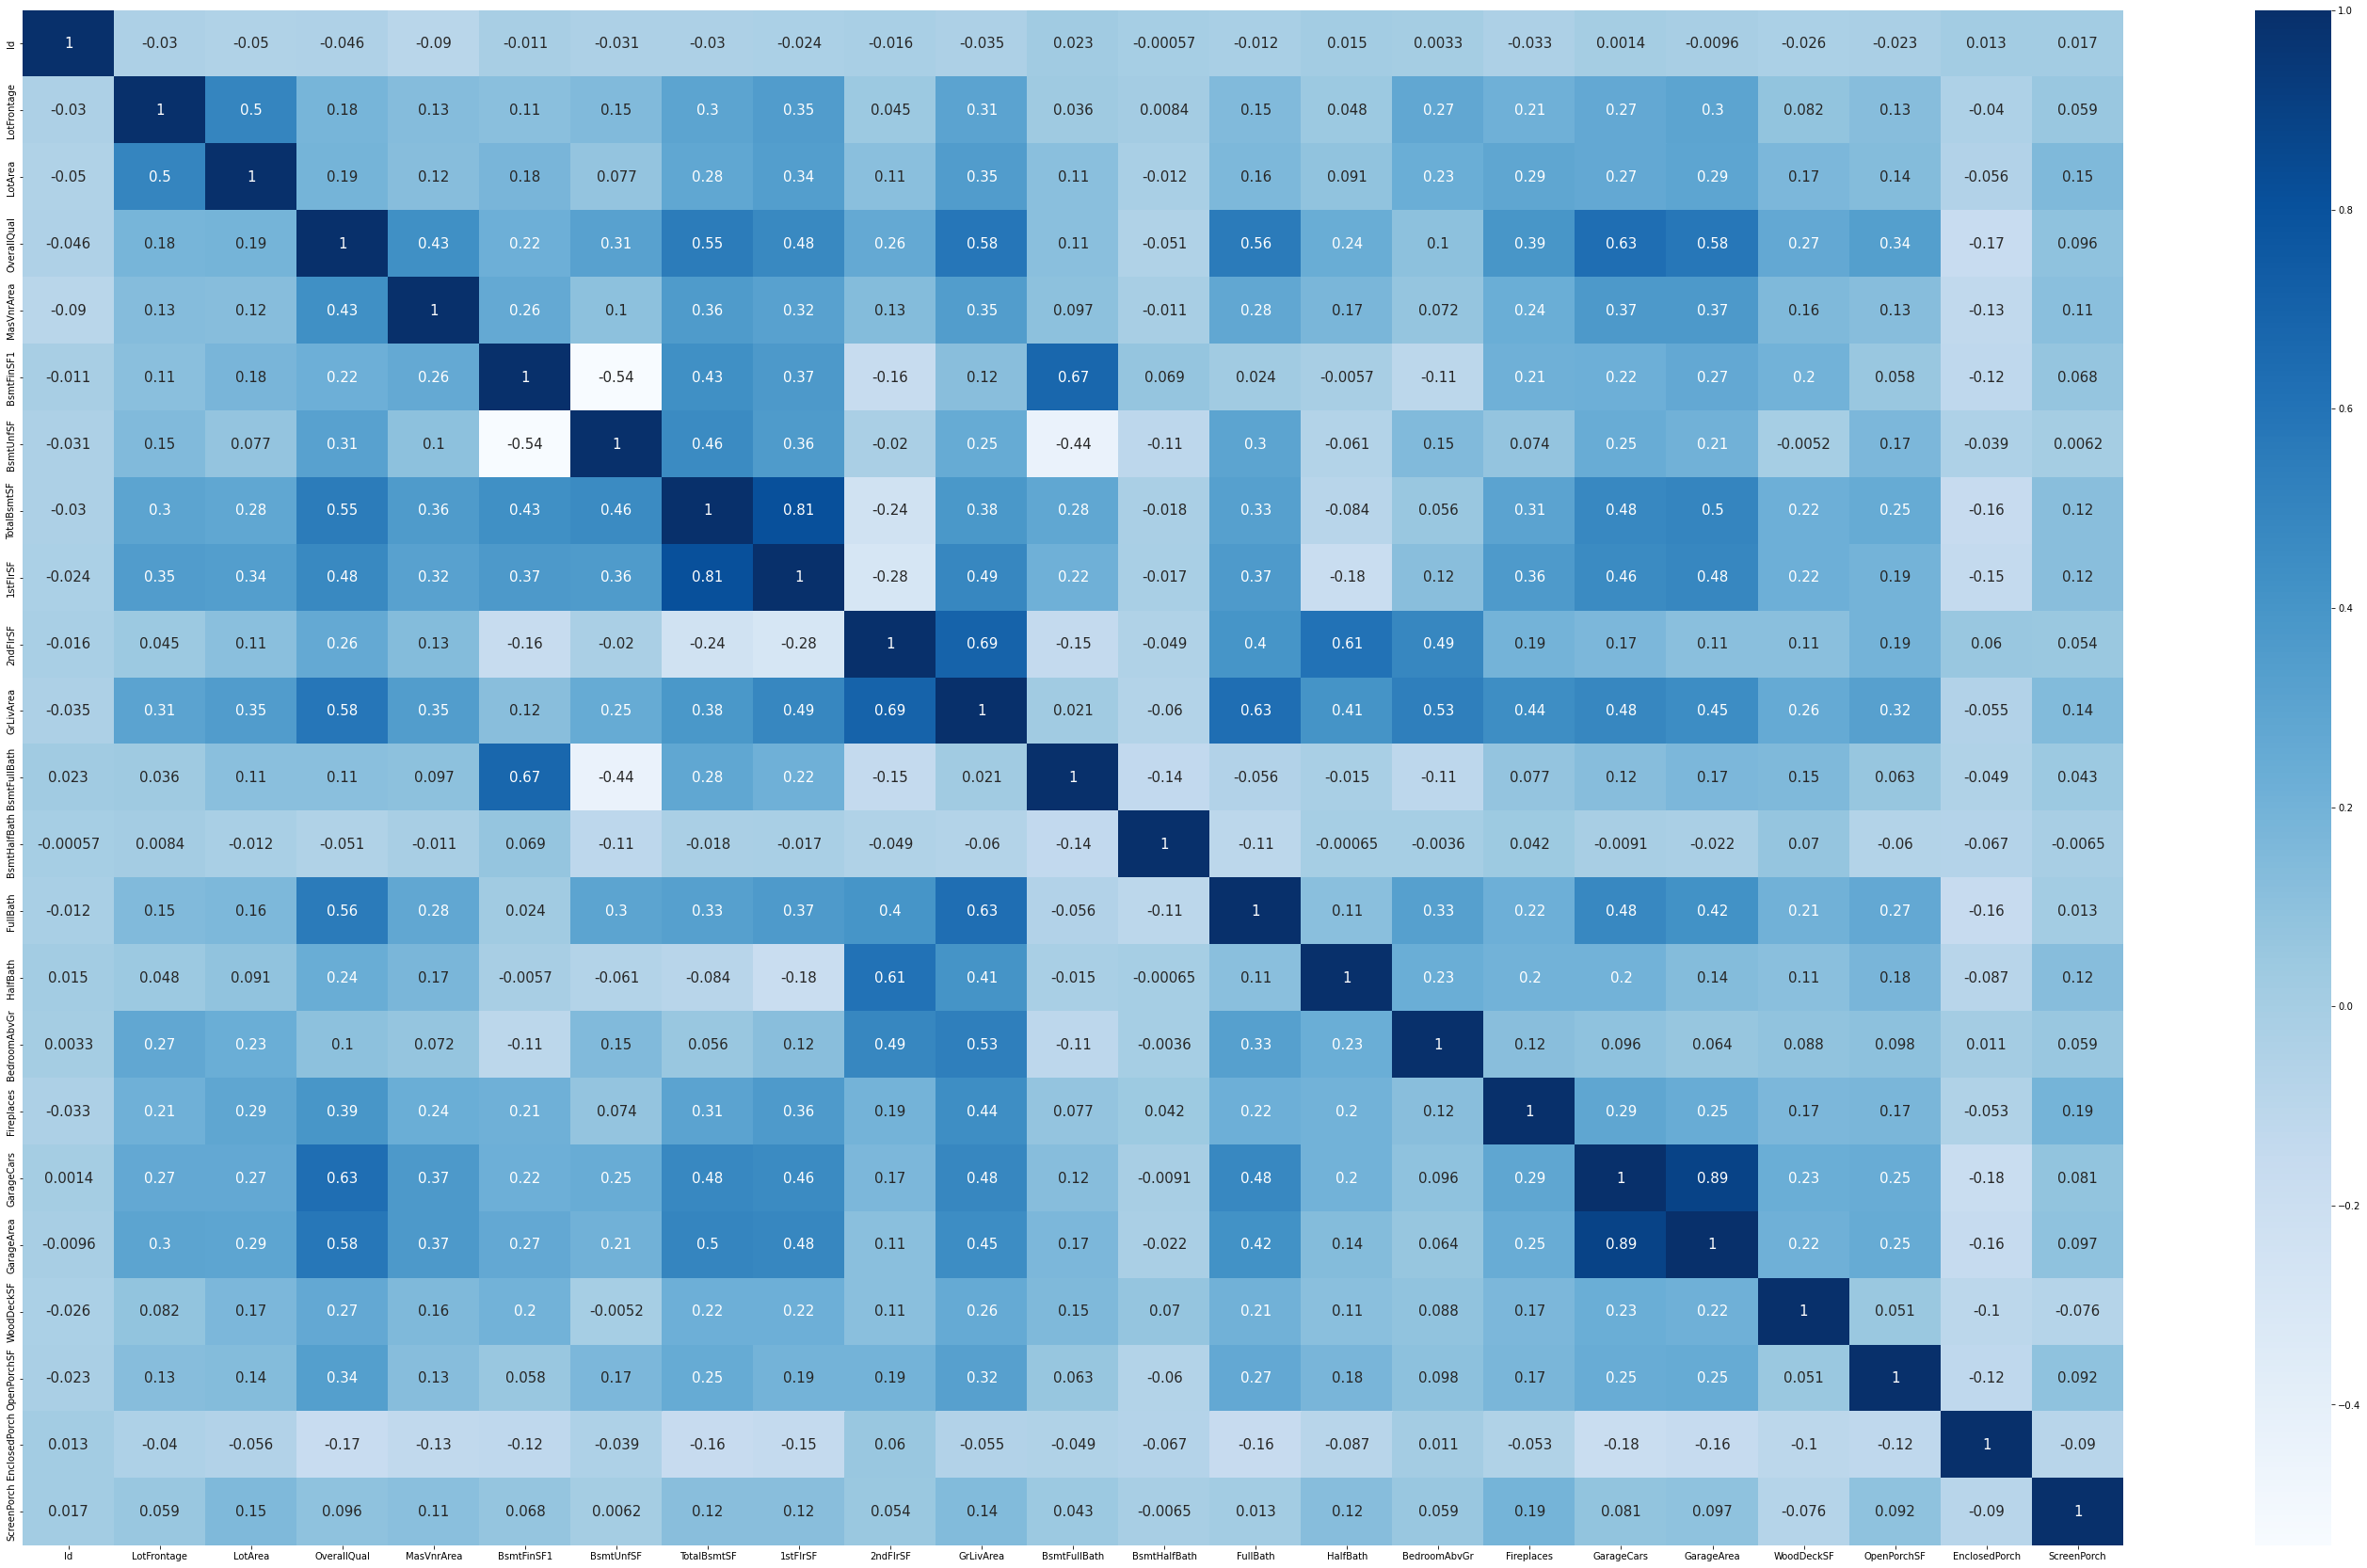

In [356]:
plt.figure(figsize=(50, 30))
sns.heatmap(x_train.corr(), annot=True, annot_kws={'size': 15}, cmap='Blues')
plt.show()

- feature들 간 약 0.7 이상일 경우 다중공선성 문제가 있는 것으로 보고 해당 feature들 중 타켓과 상관계수가 낮은 feature를 삭제
    - 1stFlrSF & TotalBsmtSF : 0.8 -> 1stFlrSF 삭제
    - GrLivArea & 2ndFlrSF : 0.69 -> 2ndFlrSF 삭제
    - GarageCars & GarageArea의 경우 0.89로 확인되지만 범주형 vs 연속형임으로 다중공선성을 파악할 수 없기때문에 삭제하지 않는다.

#### VIF(Variance Inflation Factors)를 통한 검정

In [357]:
# !pip install statsmodels

In [358]:
# VIF(Variance Inflation Factors) 사용을 위한 라이브러리 불러오기
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [359]:
# dmatrices()에 사용하기 위해 숫자로 시작하는 변수 1stFlrSF와 2ndFlrSF 변수명 재설정
x_train.rename(columns={'1stFlrSF':'firstFlrSF', '2ndFlrSF':'secondFlrSF'}, inplace=True)

In [360]:
# VIF(Variance Inflation Factors)를 통한 검정
y, X = dmatrices('SalePrice ~ firstFlrSF + secondFlrSF + TotalBsmtSF + GrLivArea', pd.concat([x_train, y_train], join='outer', axis=1), return_type = 'dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i).round(2) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,14.71,Intercept
1,53.78,firstFlrSF
2,74.11,secondFlrSF
3,2.95,TotalBsmtSF
4,89.57,GrLivArea


> * VIF 결과 firstFlrSF, secondFlrSF, GrLivArea는 10이상으로 다중공선성 관계가 있는 것으로 파악
    * 따라서 세 변수 중 두 변수를 삭제
    * heatmap에서 분석한 결과와 동일하기 때문에 firstFlrSF와 secondFlrSF 삭제

In [361]:
data_n = [col for col in x_train.columns if x_train[col].dtype == 'int64' or x_train[col].dtype == 'float64']
len(data_n)

23

In [362]:
corrmat = x_train.corr()
top_corr_dict = {}

for idx, val in enumerate(data_n):
    # 약 0.7이상이면 다중공선성 문제가 있을 수 있을 것으로 파악
    top_corr_dict[val] = corrmat.index[abs(corrmat[val]) > 0.69]
                                       
    if len(top_corr_dict[val]) >= 2: # 1개는 자기 자신
        print('기준 열 :', data_n[idx])
        print(corrmat[val][abs(corrmat[val]) > 0.69])
        print('=' * 40)

기준 열 : TotalBsmtSF
TotalBsmtSF    1.00000
firstFlrSF     0.81192
Name: TotalBsmtSF, dtype: float64
기준 열 : firstFlrSF
TotalBsmtSF    0.81192
firstFlrSF     1.00000
Name: firstFlrSF, dtype: float64
기준 열 : secondFlrSF
secondFlrSF    1.000000
GrLivArea      0.693164
Name: secondFlrSF, dtype: float64
기준 열 : GrLivArea
secondFlrSF    0.693164
GrLivArea      1.000000
Name: GrLivArea, dtype: float64
기준 열 : GarageCars
GarageCars    1.00000
GarageArea    0.88666
Name: GarageCars, dtype: float64
기준 열 : GarageArea
GarageCars    0.88666
GarageArea    1.00000
Name: GarageArea, dtype: float64


#### 다중공선성 변수 제거

In [363]:
cols = ['firstFlrSF', 'secondFlrSF']
x_train.drop(cols, axis=1, inplace=True)

### 고유 변수 제거

In [364]:
x_train.drop('Id', axis=1, inplace=True)

In [365]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 680 to 893
Data columns (total 68 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   MSSubClass         946 non-null    object  
 1   MSZoning           946 non-null    object  
 2   LotFrontage        946 non-null    float64 
 3   LotArea            946 non-null    int64   
 4   LotShape           946 non-null    object  
 5   LandContour        946 non-null    object  
 6   LotConfig          946 non-null    object  
 7   Neighborhood       946 non-null    object  
 8   Condition1         946 non-null    object  
 9   BldgType           946 non-null    object  
 10  HouseStyle         946 non-null    object  
 11  OverallQual        946 non-null    int64   
 12  RoofStyle          946 non-null    object  
 13  RoofMatl           946 non-null    object  
 14  Exterior1st        946 non-null    object  
 15  Exterior2nd        946 non-null    object  
 16  MasVnr

# 체크

### 가변수화

- int 또는 float타입이지만 범주형인 변수들: BsmtFullBath, BsmtHalfBath, BedroomAbvGr, Fireplaces, GarageCars
- 해당 변수들 확인 결과, 개수별로 중요도가 동일하게 증가한다고 판단하여 가변수화에서 제외한다.

In [366]:
# # 범주형 변수들의 모든 범주를 가져가기 위해 object타입인 경우 category타입으로 변경 후 가변수화 진행
# cat = {'MSSubClass': ['new', 'older', 'other', 'unf', 'split'],
#       'MSZoning': ['RL', 'RM', 'C (all)', 'FV', 'RH'],
#       'LotShape': ['reg', 'ir'],
#       'LandContour': ['Lvl', 'Bnk', 'HLS', 'Low'],
#       'LotConfig': ['Lvl', 'Bnk', 'HLS', 'Low'],
#       'Neighborhood': ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
#        'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'SawyerW', 'NAmes',
#        'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'StoneBr', 'ClearCr',
#        'Gilbert', 'NWAmes', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
#        'Blueste'],
#       'Condition1': ['Norm', 'nag', 'pos'],
#       'BldgType': ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'],
#       'HouseStyle': ['sto2', 'sto1', 'unf'],
#       'RoofStyle': ['Gable', 'Hip', 'Others'],
#       'RoofMatl': ['CompShg', 'Wood', 'Others'],
#       'Exterior1st': ['VinylSd', 'MetalSd', 'Wood', 'Brick', 'HdBoard', 'Panull', 'Shn', 'Stucco'],
#        'Exterior2nd': ['VinylSd', 'MetalSd', 'Wood', 'HdBoard', 'Panull', 'Brick', 'Stucco', 'Shn'],
#        'MasVnrType': ['BrkFace', 'None', 'Stone', 'BrkCmn'],
#        'ExterQual': ['Gd', 'TA', 'Ex', 'Fa'],
#        'ExterCond': ['TA', 'Fa', 'Gd', 'Po', 'Ex'],       
#       'Foundation': ['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'],
#       'BsmtQual': ['Gd', 'TA', 'Ex', 'Na', 'Fa'],
#       'BsmtCond': ['TA', 'Gd', 'Na', 'Fa', 'Po'],
#       'BsmtExposure': ['No', 'Gd', 'Mn', 'Av', 'Na'],
#       'BsmtFinType1': ['GLQ', 'ALQ', 'Unf', 'Rec', 'NA', 'LwQ', 'BLQ'],
#       'BsmtFinType2': ['Unf', 'NA', 'Rec', 'BLQ', 'GLQ', 'LwQ', 'ALQ'],
#       'Heating': ['GasA', 'GasW', 'Grav', 'Wall', 'OthW'],
#       'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
#       'CentralAir': ['Y', 'N'],
#       'Electrical': ['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'],
#       'KitchenAbvGr': ['1개', '2개 이상'],
#       'KitchenQual': ['Gd', 'TA', 'Ex', 'Fa'],
#       'Functional': ['Typ', 'Min', 'Maj'],
#       'FireplaceQu': ['No', 'TA', 'Gd', 'Ex', 'Fa', 'Po'],
#       'GarageType': ['At', 'Dt', 'Others', 'No'],
#       'GarageFinish': ['RFn', 'Unf', 'Fin', 'No'],
#       'GarageQual': ['TA', 'Fa', 'Gd', 'No', 'Ex', 'Po'],
#       'GarageCond': ['TA', 'Po', 'No', 'Gd'],
#       'PavedDrive': ['Y', 'N', 'P'],
#       'PoolQC': ['NO', 'Fa', 'Gd'],
#       'Fence': ['NO', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'],
#       'SaleType': ['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
#       'SaleCondition': ['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family']}

# for k, v in cat.items():
#     x_train[k] = pd.Categorical(x_train[k], categories=v, ordered=False)

# # 확인
# x_train.info()

In [367]:
# 범주형 변수들의 모든 범주를 가져가기 위해 object타입인 경우 category타입으로 변경 후 가변수화 진행
cat = {'MSSubClass': ['new', 'older', 'other', 'unf', 'split'],
      'MSZoning': ['A', 'C (all)', 'FV', 'RH', 'RL', 'RP', 'RM', 'I'],
      'LotShape': ['reg', 'ir'],
      'LandContour': ['Lvl', 'Bnk', 'HLS', 'Low'],
      'LotConfig': ['Inside', 'FR2', 'Corner', 'FR3', 'CulDSac'],
      'Neighborhood': ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'SawyerW', 'NAmes',
       'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'StoneBr', 'ClearCr',
       'Gilbert', 'NWAmes', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste'],
      'Condition1': ['Norm', 'nag', 'pos'],
      'BldgType': ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'],
      'HouseStyle': ['sto2', 'sto1', 'unf'],
      'RoofStyle': ['Gable', 'Hip', 'Others'],
      'RoofMatl': ['CompShg', 'Wood', 'Others'],
      'Exterior1st': ['HdBoard', 'VinylSd', 'MetalSd', 'Wood', 'Panull', 'Shn', 'Brick', 'Other'],
       'Exterior2nd': ['Panull', 'VinylSd', 'HdBoard', 'MetalSd', 'Wood', 'Shn', 'Brick', 'Other'],
       'MasVnrType': ['BrkFace', 'None', 'Stone', 'BrkCmn', 'CBlock'],
       'ExterQual': ['Gd', 'TA', 'Ex', 'Fa', 'Po'],
       'ExterCond': ['TA', 'Fa', 'Gd', 'Po', 'Ex'],       
      'Foundation': ['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'],
      'BsmtQual': ['Gd', 'TA', 'Ex', 'Na', 'Fa', 'Po'],
      'BsmtCond': ['TA', 'Gd', 'Na', 'Fa', 'Po', 'Ex'],
      'BsmtExposure': ['No', 'Gd', 'Mn', 'Av', 'Na'],
      'BsmtFinType1': ['GLQ', 'ALQ', 'Unf', 'Rec', 'NA', 'LwQ', 'BLQ'],
      'BsmtFinType2': ['Unf', 'NA', 'Rec', 'BLQ', 'GLQ', 'LwQ', 'ALQ'],
      'Heating': ['Floor', 'GasA', 'GasW', 'Grav', 'Wall', 'OthW'],
      'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
      'CentralAir': ['Y', 'N'],
      'Electrical': ['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'],
      'KitchenAbvGr': ['1개', '2개 이상'],
      'KitchenQual': ['Gd', 'TA', 'Ex', 'Fa', 'Po'],
      'Functional': ['Typ', 'Min', 'Maj', 'Sev', 'Sal'],
      'FireplaceQu': ['No', 'TA', 'Gd', 'Ex', 'Fa', 'Po'],
      'GarageType': ['At', 'Dt', 'Others', 'No'],
      'GarageFinish': ['RFn', 'Unf', 'Fin', 'No'],
      'GarageQual': ['TA', 'Fa', 'Gd', 'No', 'Ex', 'Po'],
      'GarageCond': ['TA', 'Po', 'No', 'Gd'],
      'PavedDrive': ['Y', 'N', 'P'],
      'PoolQC': ['NO', 'Fa', 'Gd', 'Ex', 'TA'],
      'Fence': ['NO', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'],
      'SaleType': ['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth', 'VWD'],
      'SaleCondition': ['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family']}

for k, v in cat.items():
    x_train[k] = pd.Categorical(x_train[k], categories=v, ordered=False)

# 확인
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 680 to 893
Data columns (total 68 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   MSSubClass         946 non-null    category
 1   MSZoning           946 non-null    category
 2   LotFrontage        946 non-null    float64 
 3   LotArea            946 non-null    int64   
 4   LotShape           946 non-null    category
 5   LandContour        946 non-null    category
 6   LotConfig          946 non-null    category
 7   Neighborhood       946 non-null    category
 8   Condition1         946 non-null    category
 9   BldgType           946 non-null    category
 10  HouseStyle         946 non-null    category
 11  OverallQual        946 non-null    int64   
 12  RoofStyle          946 non-null    category
 13  RoofMatl           946 non-null    category
 14  Exterior1st        946 non-null    category
 15  Exterior2nd        946 non-null    category
 16  MasVnr

In [368]:
cat_cols = [col for col in x_train.columns if x_train[col].dtype != 'float64' if x_train[col].dtype != 'int64']
len(cat_cols)

48

In [369]:
x_train = pd.get_dummies(x_train, columns=cat_cols, drop_first=True)
x_train.tail(1)

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MSSubClass_older,MSSubClass_other,MSSubClass_unf,MSSubClass_split,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RP,MSZoning_RM,MSZoning_I,LotShape_ir,LandContour_Bnk,LandContour_HLS,LandContour_Low,LotConfig_FR2,LotConfig_Corner,LotConfig_FR3,LotConfig_CulDSac,Neighborhood_Veenker,Neighborhood_Crawfor,Neighborhood_NoRidge,...,PoolQC_Ex,PoolQC_TA,Fence_MnPrv,Fence_GdPrv,Fence_GdWo,Fence_MnWw,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleType_VWD,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,YearBuilt_grp_~1950,YearBuilt_grp_~2000,YearBuilt_grp_2000~,YearRemodAdd_grp_~2000,YearRemodAdd_grp_2000~,BsmtFinSF1_grp_500미만,BsmtFinSF1_grp_1000미만,BsmtFinSF1_grp_1500미만,BsmtFinSF1_grp_1500이상,BsmtUnfSF_grp_500미만,BsmtUnfSF_grp_1000미만,BsmtUnfSF_grp_1500미만,BsmtUnfSF_grp_2000미만,BsmtUnfSF_grp_2000이상,WoodDeckSF_cut_200미만,WoodDeckSF_cut_200이상,OpenPorchSF_cut_100미만,OpenPorchSF_cut_100이상,EnclosedPorch_cut_100미만,EnclosedPorch_cut_200미만,EnclosedPorch_cut_300미만,EnclosedPorch_cut_300이상
893,60.0,8400,2,0.0,290,0,290,438,0,0,1,0,1,0,1,246,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [370]:
# print([col for col in x_train.columns])

In [371]:
# # 최최종
# tmp1 = ['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MSSubClass_older', 'MSSubClass_other', 'MSSubClass_split', 'MSSubClass_unf', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_nag', 'Condition1_pos', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_sto2', 'HouseStyle_unf', 'RoofStyle_Hip', 'RoofStyle_Others', 'RoofMatl_Others', 'RoofMatl_Wood', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Panull', 'Exterior1st_Shn', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wood', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_Panull', 'Exterior2nd_Shn', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wood', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_Na', 'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_Na', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_Na', 'BsmtExposure_No', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_NA', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_NA', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 'KitchenAbvGr_2개 이상', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'TotRmsAbvGrd_5~8', 'TotRmsAbvGrd_9~', 'Functional_Min', 'Functional_Typ', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_No', 'FireplaceQu_Po', 'FireplaceQu_TA', 'GarageType_Dt', 'GarageType_No', 'GarageType_Others', 'GarageYrBlt_1900년대', 'GarageYrBlt_1910년대', 'GarageYrBlt_1920년대', 'GarageYrBlt_1930년대', 'GarageYrBlt_1940년대', 'GarageYrBlt_1950년대', 'GarageYrBlt_1960년대', 'GarageYrBlt_1970년대', 'GarageYrBlt_1980년대', 'GarageYrBlt_1990년대', 'GarageYrBlt_2000년대', 'GarageFinish_No', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_No', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_No', 'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P', 'PavedDrive_Y', 'PoolQC_Gd', 'PoolQC_NO', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'Fence_NO', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial', 'YearBuilt_grp_~1950', 'YearBuilt_grp_~2000', 'YearBuilt_grp_2000~', 'YearRemodAdd_grp_~2000', 'YearRemodAdd_grp_2000~', 'BsmtFinSF1_grp_500미만', 'BsmtFinSF1_grp_1000미만', 'BsmtFinSF1_grp_1500미만', 'BsmtFinSF1_grp_1500이상', 'BsmtUnfSF_grp_500미만', 'BsmtUnfSF_grp_1000미만', 'BsmtUnfSF_grp_1500미만', 'BsmtUnfSF_grp_2000미만', 'BsmtUnfSF_grp_2000이상', 'WoodDeckSF_cut_200미만', 'WoodDeckSF_cut_200이상', 'OpenPorchSF_cut_100미만', 'OpenPorchSF_cut_100이상', 'EnclosedPorch_cut_100미만', 'EnclosedPorch_cut_200미만', 'EnclosedPorch_cut_300미만', 'EnclosedPorch_cut_300이상']
# # 최최종 수정정
# tmp2 = [col for col in x_train.columns]
# result = []  # 최최종 수정본에만 있는 애들(cat변경 후)

# for i in range(len(tmp2)):
#     if tmp2[i] in tmp1:
#         pass
#     else:
#         result.append(tmp2[i])
# print(result)

In [372]:
# tmp2.sort()

In [373]:
# tmp2

In [374]:
# x['MSZoning'].unique()

In [375]:
# result2 = []  # 최최종에만 있는 애들(cat 변경 전)
# for i in range(len(tmp1)):
#     if tmp1[i] in tmp2:
#         pass
#     else:
#         result2.append(tmp1[i])
# print(result2)

In [376]:
# # 가변수화 필요한 범주형 변수들
# data_c = x_train.select_dtypes(include = ['object', 'category'])

In [377]:
# cat_cols = data_c.columns
# x_train = pd.get_dummies(x_train, columns=cat_cols, drop_first=True)
# print(len(x_train.columns))
# x_train.tail(1)

### 스케일링

In [378]:
# 스케일링을 위한 라이브러리 불러오기
from sklearn.preprocessing import MinMaxScaler

In [379]:
# KNN, SVM등 정규화가 필요한 모델들을 위해 스케일링을 함
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)

# val 셋에 전처리코드 적용

In [380]:
# 변수 1~16
def fe1(df):
    temp = df.copy()
    
    fre_D = temp['LotFrontage'].value_counts().idxmax()  # 최빈값
    temp['LotFrontage'].fillna(fre_D, inplace=True)
    
    temp = temp.drop('Alley', axis=1)
    temp = temp.drop('Utilities', axis=1)
    
    temp['MSSubClass'].loc[temp['MSSubClass'].isin([20,60,120])] = 'new'
    temp['MSSubClass'].loc[temp['MSSubClass'].isin([30,70,160])] = 'older'
    temp['MSSubClass'].loc[temp['MSSubClass'].isin([40,45])] = 'unf'
    temp['MSSubClass'].loc[temp['MSSubClass'].isin([80,85,180])] = 'split'
    temp['MSSubClass'].loc[temp['MSSubClass'].isin([50,75,90,150,190])] = 'other'
    
    temp['LotShape'].loc[temp.LotShape == 'Reg'] = 'reg'
    temp['LotShape'].loc[temp['LotShape'].isin(['IR1','IR2','IR3'])] = 'ir'
    
    temp['LandSlope'].loc[temp.LotShape == 'Gtl'] = 'Gtl'
    temp['LandSlope'].loc[temp['LandSlope'].isin(['Sev','Mod'])] = 'ste'
    
    temp['Condition1'].loc[temp.LotShape == 'Norm'] = 'Norm'
    temp['Condition1'].loc[temp['Condition1'].isin(['PosN','PosA'])] = 'pos'
    temp['Condition1'].loc[temp['Condition1']\
                        .isin(['Feedr','Artery','RRAe','RRNn','RRAn','RRNe'])] = 'nag'

    temp['HouseStyle'].loc[temp['HouseStyle'].isin(['1Story','1.5Fin'])] = 'sto1'
    temp['HouseStyle'].loc[temp['HouseStyle'].isin(['2Story','SFoyer','SLvl','2.5Fin'])] = 'sto2'
    temp['HouseStyle'].loc[temp['HouseStyle'].isin(['2.5Unf','1.5Unf'])] = 'unf'
    
    return temp

In [381]:
# 변수 17~32
def fe2(df):
    temp = df.copy()
    
    temp['MasVnrArea'].fillna(0, inplace=True)
    temp['MasVnrType'].fillna('None', inplace=True)
    temp['BsmtQual'].fillna('Na', inplace=True)
    temp['BsmtCond'].fillna('Na', inplace=True)
    temp['BsmtExposure'].fillna('Na', inplace=True)
    
    temp['RoofStyle'] = temp['RoofStyle']\
        .map({'Gable':'Gable', 'Hip':'Hip', 'Flat':'Others',
          'Gambrel':'Others', 'Mansard':'Others','Shed':'Others'})
    
    temp['RoofMatl'] = temp['RoofMatl']\
        .map({'CompShg':'CompShg', 'WdShngl':'Wood','WdShake':'Wood', 'Metal':'Others',
          'Membran':'Others','Tar&Grv':'Others', 'Roll':'Others','ClyTile':'Others'})
    
    temp['Exterior1st'] = temp['Exterior1st']\
        .map({'VinylSd':'VinylSd', 'HdBoard':'HdBoard','MetalSd':'MetalSd','Wd Sdng':'Wood',
              'WdShing':'Wood','Plywood':'Panull', 'CemntBd':'Panull','BrkComm':'Brick',
              'BrkFace':'Brick','CBlock':'Brick','Stone':'Brick', 'PreCast': 'Brick',
              'AsphShn':'Shn', 'AsbShng':'Shn','ImStucc':'Other','Stucco':'Other','Other':'Other'})
    
    temp['Exterior2nd'] = temp['Exterior2nd']\
        .map({'VinylSd':'VinylSd', 'HdBoard':'HdBoard','MetalSd':'MetalSd',
          'Wd Sdng':'Wood', 'Wd Shng':'Wood','Plywood':'Panull',
          'CmentBd':'Panull','Brk Cmn':'Brick','BrkFace':'Brick',
          'CBlock':'Brick','Stone':'Brick', 'PreCast': 'Brick', 'AsphShn':'Shn','AsbShng':'Shn',
          'ImStucc':'Other','Stucco':'Other','Other':'Other'})
    
    # 지어진 년도: 1800 후반, ~1950, ~2000, 2000~
    bin = [-np.inf, 1900, 1951, 2001, np.inf]
    label = ['1800 후반', '~1950', '~2000', '2000~']
    temp['YearBuilt_grp'] = pd.cut(temp['YearBuilt'], bins=bin, right=False, labels=label)
    # 기존 변수 제거
    temp.drop('YearBuilt', axis=1, inplace=True)
    
    # 리모델링 년도: ~1950, ~2000, 2000~
    bin = [-np.inf, 1951, 2001, np.inf]
    label = ['~1950', '~2000', '2000~']
    temp['YearRemodAdd_grp'] = pd.cut(temp['YearRemodAdd'], bins=bin, right=False, labels=label)
    # 기존 변수 제거
    temp.drop('YearRemodAdd', axis=1, inplace=True)
    
    return temp

In [382]:
# 변수 33~48 전처리
def fe3(df):
    temp = df.copy()
    
    temp['BsmtFinType1'].fillna("NA", inplace = True)
    temp['BsmtFinType2'].fillna("NA", inplace = True)

    ## 최빈값으로 채움
    temp['Electrical'].fillna(x['Electrical'].mode()[0], inplace = True)
    
    bins = [-np.inf, 1, 500, 1000, 1500, np.inf]
    labels = ['없음', '500미만', '1000미만', '1500미만', '1500이상']
    temp['BsmtFinSF1_grp'] = pd.cut(temp['BsmtFinSF1'], bins, labels=labels, right=False)
    
    bins = [-np.inf, 1, 500, 1000, 1500, 2000, np.inf]
    labels = ['없음', '500미만', '1000미만', '1500미만', '2000미만', '2000이상']
    temp['BsmtUnfSF_grp'] = pd.cut(temp['BsmtUnfSF'], bins, labels=labels, right=False)    
    
    return temp

In [383]:
# 변수 49~64 전처리
def fe4(df):
    temp = df.copy()
    
    temp['FireplaceQu'].fillna('No', inplace=True)
    temp['GarageType'].fillna('No', inplace=True)
    temp['GarageYrBlt'].fillna(0, inplace=True)
    temp['GarageFinish'].fillna('No', inplace=True)
    temp['GarageQual'].fillna('No', inplace=True)
    temp['GarageCond'].fillna('No', inplace=True)
    
    temp['KitchenAbvGr'] = temp['KitchenAbvGr'].map({ 1:'1개', 2:'2개 이상', 3:'2개 이상'})
    
    bin = [1, 5, 9, np.inf]
    label = ['~4', '5~8', '9~']
    temp['TotRmsAbvGrd'] = pd.cut(temp['TotRmsAbvGrd'], bins=bin, labels=label, right=False)
    
    temp['Functional'] = temp['Functional']\
        .map({'Min1':'Min', 'Min2':'Min', 'Maj1':'Maj', 'Maj2':'Maj', 'Mod':'Typ','Typ':'Typ',
             'Sev': 'Sev', 'Sal': 'Sal'})
    
    temp['GarageType'] = temp['GarageType']\
        .map({'Attchd':'At', 'Detchd':'Dt', 'BuiltIn':'Others', 'CarPort':'Others',
              'Basment':'Others', '2Types':'Others', 'No':'No'})
    
    bin = [-np.inf, 1, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, np.inf]
    label = ['No', '1900년대', '1910년대', '1920년대', '1930년대',
             '1940년대', '1950년대', '1960년대', '1970년대', '1980년대', '1990년대', '2000년대']
    temp['GarageYrBlt'] = pd.cut(temp['GarageYrBlt'], bins=bin, labels=label, right=False)
    
    temp['GarageCond'] = temp['GarageCond']\
        .map({'TA':'TA', 'No':'No', 'Ex':'Gd','Gd':'Gd','Fa':'Po','Po':'Po'})
    
    return temp

In [384]:
# 변수 65~80 전처리
def fe5(df):
    temp = df.copy()
        
    # 변수 65~80 전처리
    temp['PoolQC'].fillna('NO', inplace=True)
    temp['Fence'].fillna('NO', inplace=True)
    temp['MiscFeature'].fillna('NO', inplace=True)
    
    bin = [-np.inf, 1, 200, np.inf]
    label = ['No', '200미만', '200이상']
    temp['WoodDeckSF_cut'] = pd.cut(temp['WoodDeckSF'], bins=bin, labels=label, right=False)
    
    bin = [-np.inf, 1, 100, np.inf]
    label = ['No', '100미만', '100이상']
    temp['OpenPorchSF_cut'] = pd.cut(temp['OpenPorchSF'], bins=bin, labels=label, right=False)
    
    bin = [-np.inf, 1, 100, 200, 300, np.inf]
    label = ['No', '100미만', '200미만', '300미만', '300이상']
    temp['EnclosedPorch_cut'] = pd.cut(temp['EnclosedPorch'], bins=bin, labels=label, right=False)
    
    return temp

In [385]:
def del_fe(df):
    temp = df.copy()
    
    # 이변량 분석을 통한 변수 제거
    cols = ['Street', 'LandSlope', 'Condition2', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF',
            '3SsnPorch', 'PoolArea', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold']
    temp.drop(cols, axis=1, inplace=True)
    
    # 다중공선성을 위한 변수명 변경(밑에서 제거)
    temp.rename(columns={'1stFlrSF':'firstFlrSF', '2ndFlrSF':'secondFlrSF'}, inplace=True)
    
    # 다중공선성 변수 제거
    cols = ['firstFlrSF', 'secondFlrSF']
    temp.drop(cols, axis=1, inplace=True)
    
    # 고유값 변수 제거
    temp.drop('Id', axis=1, inplace=True)
    
    return temp

In [386]:
def dumm_fe(df):
    temp = df.copy()
    
    # category로 타입변경
    for k, v in cat.items():
        temp[k] = pd.Categorical(temp[k], categories=v, ordered=False)
    
    # 가변수화
    cat_cols = [col for col in temp.columns if temp[col].dtype != 'float64' if temp[col].dtype != 'int64']
    temp = pd.get_dummies(temp, columns=cat_cols, drop_first=True)
    
    return temp

In [387]:
x_val = fe1(x_val)
x_val = fe2(x_val)
x_val = fe3(x_val)
x_val = fe4(x_val)
x_val = fe5(x_val)
x_val = del_fe(x_val)
x_val = dumm_fe(x_val)

In [388]:
# 스케일러 불러오기
x_val_s = scaler.transform(x_val)

# 모델링

In [389]:
# 라이브러리 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# import lightgbm as lgb
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Linear Regression

In [390]:
# 선언하기
lr = LinearRegression()

In [391]:
# 학습하기
lr.fit(x_train, y_train)

LinearRegression()

In [392]:
# 예측하기
lr_pred = lr.predict(x_val)

In [393]:
# 평가하기
print('MSE:', mean_squared_error(y_val, lr_pred))
# print('RMSE: ', math.sqrt(mean_squared_error(y_val, y_pred)))
print('R2-Score:', r2_score(y_val, lr_pred))

MSE: 796069855.0227677
R2-Score: 0.9029058334160777


In [394]:
# y절편
print(lr.intercept_)

-21262.694664644456


In [395]:
# 회귀계수
coe = pd.DataFrame(lr.coef_[0], list(x), columns=['coefficient'])
coe['abs_coefficient'] = abs(coe['coefficient'])
coe.sort_values(by='abs_coefficient', ascending=False).head()

,coefficient,abs_coefficient
Id,57.994362,57.994362
MSSubClass,57.994362,57.994362
GarageType,57.994362,57.994362
FireplaceQu,57.994362,57.994362
Fireplaces,57.994362,57.994362


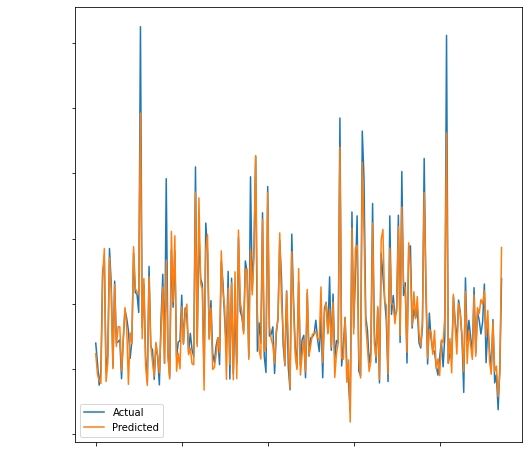

In [396]:
# 예측값, 실제값 시각화
plt.figure(figsize=(8, 8))
plt.plot(y_val.values, label='Actual')
plt.plot(lr_pred, label='Predicted')
plt.legend()
plt.xticks(color='w') 
plt.yticks(color='w') 
plt.ylabel('SalePrice', color='w', size=20)
plt.show()

In [397]:
# 결과저장
result_mse = {}
result_r2 = {}
result_mse['LinearRegression'] = mean_squared_error(y_val, lr_pred)
result_r2['LinearRegression'] = r2_score(y_val, lr_pred)

## Decision Tree

In [398]:
# 선언하기 - max_depth, random_state속성을 줄 수 있음
dt = DecisionTreeRegressor(max_depth=3)

In [399]:
# 학습하기
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

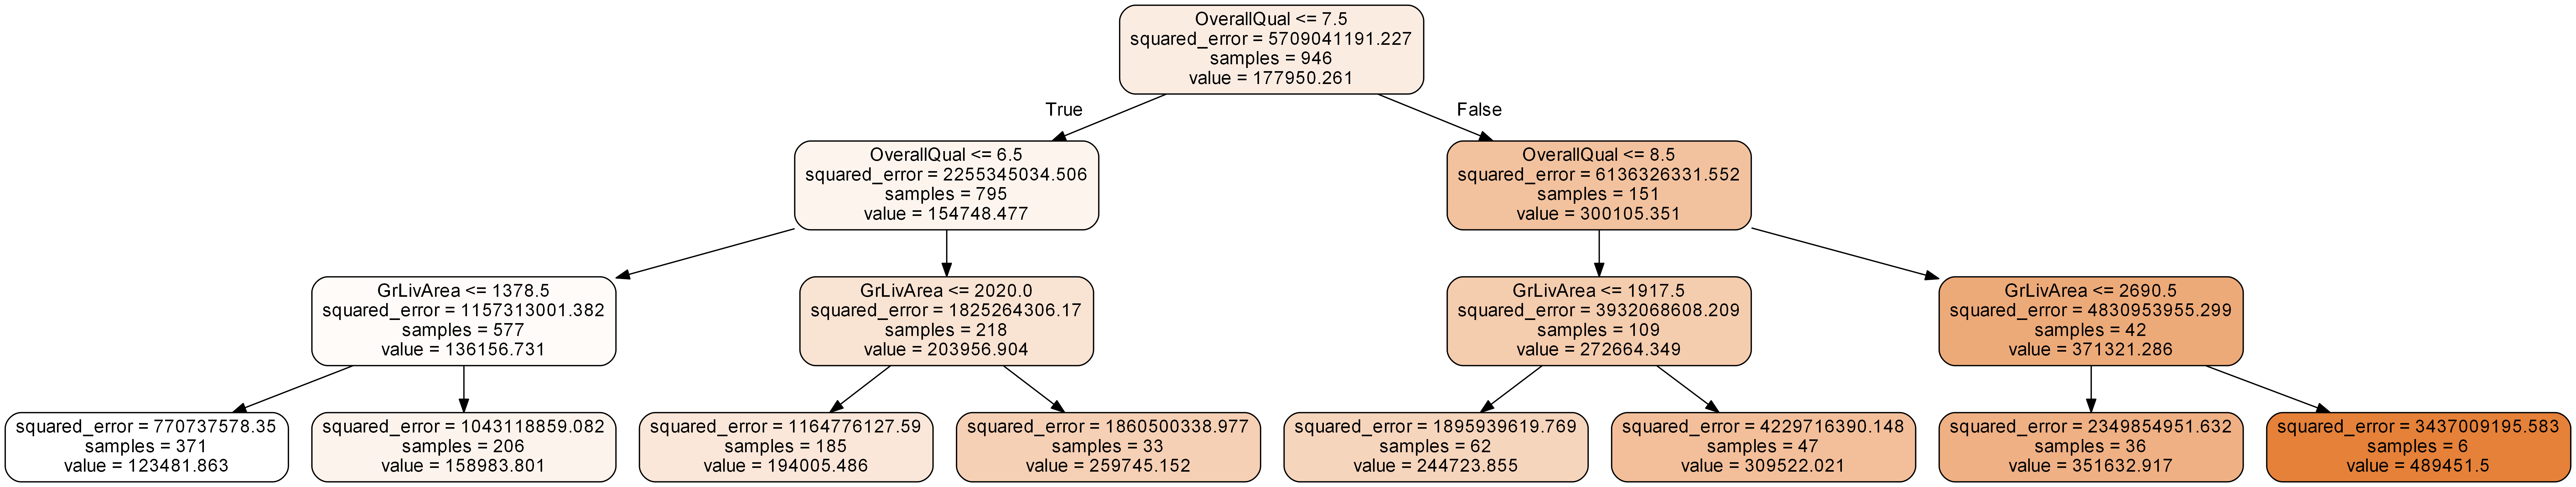

In [400]:
# 시각화
from sklearn.tree import export_graphviz

export_graphviz(dt,
               out_file = 'tree.dot',
               feature_names = x_train.columns,  # feature 이름
               rounded = True, precision = 3, filled = True)
!dot -Tpng tree.dot -o tree.png -Gdpi=300

# 이미지 파일 로딩
from IPython.display import Image
Image(filename = 'tree.png', width = 800)  # 사이즈 조정

In [401]:
train_mae, val_mae = [], []

depth = list(range(1, 20))
for d in depth:
    dt = DecisionTreeRegressor(max_depth = d)
    dt.fit(x_train, y_train)
    dt_tr_pred = dt.predict(x_train)  # train 에러 계산을 위해 x_train도 예측
    dt_pred = dt.predict(x_val)
    train_mae.append(mean_absolute_error(y_train, dt_tr_pred))
    val_mae.append(mean_absolute_error(y_val, dt_pred))
    print(d)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


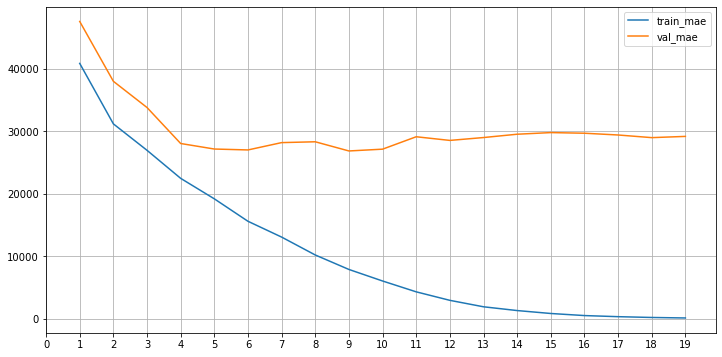

In [402]:
plt.figure(figsize = (12, 6))
plt.plot(depth, train_mae, label = 'train_mae')
plt.plot(depth, val_mae, label = 'val_mae')
plt.legend()
plt.xticks(range(20))
plt.grid()
plt.show()
# 3 정도가 적당, 이후부터는 과적합으로 판단

- max_depth를 3으로 준 상태로 시작했기때문에 별다른 튜닝을 하지 않음

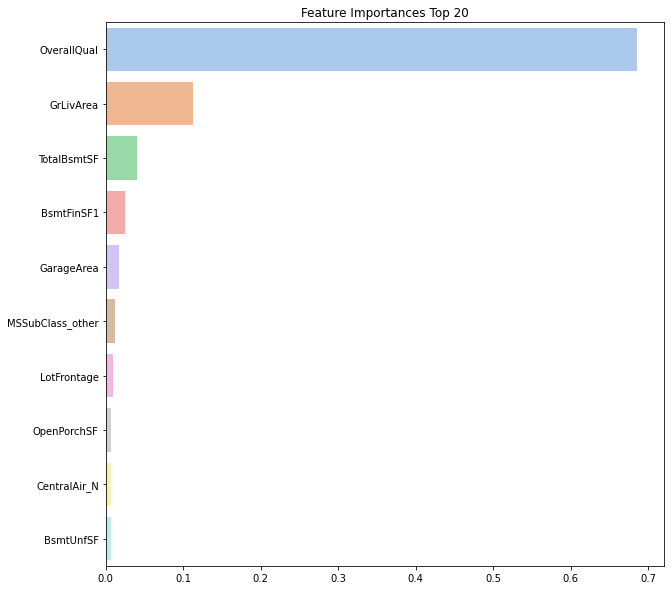

In [403]:
# 변수 중요도 시각화
import seaborn as sns

feature_importance_values = dt.feature_importances_

# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=x_train.columns)

# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=[10, 10])
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_top20, y=feature_top20.index, palette=sns.color_palette("pastel"))
plt.show()

In [404]:
# 예측
dt_pred = dt.predict(x_val)

In [405]:
# 평가
print('r2 score:', r2_score(y_val, dt_pred))
print('mse:', mean_squared_error(y_val, dt_pred))

r2 score: 0.7731248491477103
mse: 1860137172.0014067


- 사회과학(집값) 문제이므로, 일반적인 기준(0.3)에 적용해보면 유의미하다고 볼 수도 있겠다.

In [406]:
# 결과저장
result_mse['DecisionTreeRegressor'] = mean_squared_error(y_val, dt_pred)
result_r2['DecisionTreeRegressor'] = r2_score(y_val, dt_pred)

## KNN

In [407]:
# 선언하기
knn = KNeighborsRegressor()

In [408]:
# 학습하기
knn.fit(x_train_s, y_train)

KNeighborsRegressor()

In [409]:
# 예측하기
knn_pred = knn.predict(x_val_s)

In [410]:
# 평가하기
print('MSE:', mean_squared_error(y_val, knn_pred))
# print('MAE:', mean_absolute_error(y_val, y_pred))
print('R2-Score:', r2_score(y_val, knn_pred))

MSE: 2154209275.353418
R2-Score: 0.7372577884740864


### 튜닝

In [411]:
param = {'n_neighbors': range(3, 51)}

knn_t = RandomizedSearchCV(knn,
                           param, 
                           cv=10,
                           n_iter=30, 
                           scoring='r2', 
                           n_jobs=-1)

In [412]:
# 학습하기
knn_t.fit(x_train_s, y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'n_neighbors': range(3, 51)},
                   scoring='r2')

In [413]:
# mean_test_score 확인
print(knn_t.cv_results_['mean_test_score'])
print('-'*20)

# 최적 파라미터
print('최적파라미터:', knn_t.best_params_)

# 최고 성능
print('최고성능:', knn_t.best_score_)

[0.71146021 0.69557522 0.74142509 0.73269178 0.74629603 0.71800902
 0.71006566 0.71952322 0.75429846 0.73899918 0.75188339 0.73799906
 0.7433035  0.69905369 0.70233242 0.7498163  0.75858856 0.71562209
 0.75762487 0.7219713  0.75629389 0.72874079 0.73496906 0.72641988
 0.76404716 0.7578008  0.7581342  0.70080125 0.7448121  0.70624161]
--------------------
최적파라미터: {'n_neighbors': 6}
최고성능: 0.7640471604511955


### 튜닝2

In [414]:
# 변수 선언
param = {'n_neighbors': range(3, 10),
         'leaf_size': range(5, 35)}

# 선언하기
knn_t2 = GridSearchCV(knn,
                     param,
                     cv=5,
                     n_jobs=-1)

In [415]:
# 학습하기
knn_t2.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': range(5, 35),
                         'n_neighbors': range(3, 10)})

In [416]:
# 선택된 파라미터와 서능
print(knn_t2.best_params_)
print(knn_t2.best_score_)

{'leaf_size': 5, 'n_neighbors': 5}
0.7626146816804259


In [417]:
# 예측하기
knn_pred2 = knn_t2.predict(x_val_s)

In [418]:
# 평가하기
print('MSE:',mean_squared_error(y_val, knn_pred2))
print('R2-Score:', r2_score(y_val, knn_pred2))

MSE: 2154209275.353418
R2-Score: 0.7372577884740864


In [419]:
# 결과저장
result_mse['KNN'] = mean_squared_error(y_val, knn_pred2)
result_r2['KNN'] = r2_score(y_val, knn_pred2)

## SVM

In [420]:
# 선언
svm = SVR()

In [421]:
# 학습
svm.fit(x_train_s, y_train)

SVR()

In [422]:
# 예측
svm_pred = svm.predict(x_val_s)

In [423]:
# 평가
print('r2 score:', r2_score(y_val, svm_pred))  # 음수 -> 평균으로 예측하는 것보다 쓰레기 모델
print('mse:', mean_squared_error(y_val, svm_pred))

r2 score: -0.06294844914687836
mse: 8715057223.109724


### 튜닝

In [424]:
# 선언
params = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]}
svm_t = GridSearchCV(svm, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error')

In [425]:
# 학습
svm_t.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [426]:
# 최적 파라미터 확인
svm_t.best_params_

{'C': 100, 'gamma': 0.01}

In [427]:
# 예측
svm_pred = svm_t.predict(x_val_s)

In [428]:
# 평가
print('r2 score:', r2_score(y_val, svm_pred))  # 음수 -> 평균으로 예측하는 것보다 쓰레기 모델
print('mse:', mean_squared_error(y_val, svm_pred))

r2 score: -0.028142420298623794
mse: 8429684462.685448


- r2 score가 음수 -> 평균으로 예측하는 것보다 쓰레기 모델

In [429]:
# 결과저장
result_mse['SVR'] = mean_squared_error(y_val, svm_pred)
result_r2['SVR'] = r2_score(y_val, svm_pred)

## Random Forest

In [430]:
# 선언하기
rf = RandomForestRegressor(random_state=2022)

In [431]:
# 학습하기
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=2022)

In [432]:
# 예측하기
rf_pred = rf.predict(x_val)

In [433]:
# 평가하기
print('MSE:',mean_squared_error(y_val, rf_pred))
print('R2-score:',r2_score(y_val, rf_pred))

MSE: 1082210645.025963
R2-score: 0.8680061303865856


### 튜닝1

In [434]:
train_mae, val_mae = [], []

depth = list(range(3, 20))
for d in depth:
    rf_t = RandomForestRegressor(max_depth = d, random_state=2022)
    rf_t.fit(x_train, y_train)
    rf_tr_pred = rf_t.predict(x_train)  # train 에러 계산을 위해 x_train도 예측
    rf_pred = rf_t.predict(x_val)
    train_mae.append(mean_absolute_error(y_train, rf_tr_pred))
    val_mae.append(mean_absolute_error(y_val, rf_pred))
    print(d)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


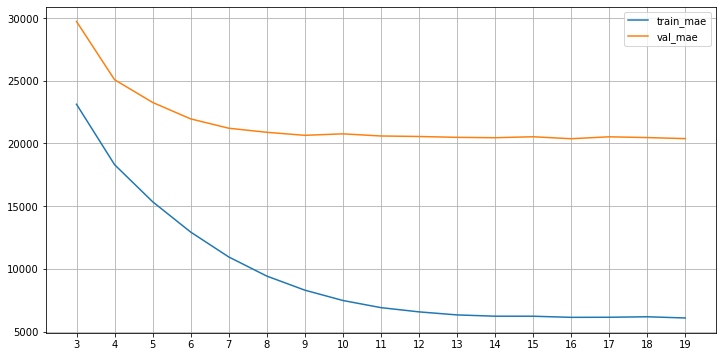

In [435]:
plt.figure(figsize = (12, 6))
plt.plot(depth, train_mae, label = 'train_mae')
plt.plot(depth, val_mae, label = 'val_mae')
plt.legend()
plt.xticks(range(3, 20))
plt.grid()
plt.show()
# 3~5 정도가 적당, 이후부터는 과적합으로 판단

### 튜닝2

In [436]:
param = {'max_depth':range(1, 6),  # 5 기준으로 앞뒤 2~3개
         'n_estimators':range(1,121,10)}

rf_r = RandomForestRegressor(max_depth=3, random_state=2022)

rf_g = GridSearchCV(rf_r,
                    param,
                    cv=10,
                    n_jobs=-1)

In [437]:
rf_g.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=3, random_state=2022),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 6),
                         'n_estimators': range(1, 121, 10)})

In [438]:
print('최적 파라미터:', rf_g.best_params_)
print('최고 성능:', rf_g.best_score_)

최적 파라미터: {'max_depth': 5, 'n_estimators': 31}
최고 성능: 0.8573397799251568


In [439]:
# 선언
rf_t = RandomForestRegressor(max_depth=5,
                             n_estimators=31,
                             random_state=2022)

In [440]:
rf_t.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=31, random_state=2022)

In [441]:
# 예측
rf_t_pred = rf_t.predict(x_val)

In [442]:
# 평가
print('MSE:', mean_squared_error(y_val, rf_t_pred))
print('R2-score:', r2_score(y_val, rf_t_pred))

MSE: 1297931608.5422838
R2-score: 0.841695314777698


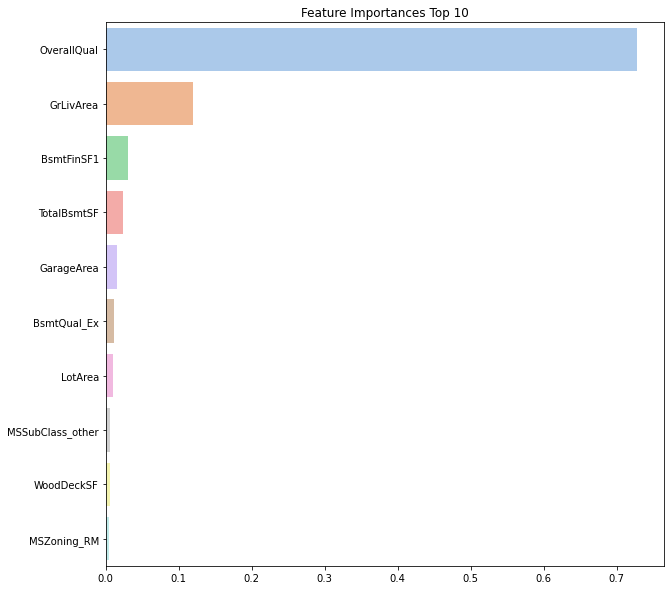

In [443]:
# 변수 중요도 시각화
feature_importance_values = rf_t.feature_importances_

# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=x_train.columns)

# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=[10, 10])
plt.title('Feature Importances Top 10')
sns.barplot(x=feature_top20, y=feature_top20.index, palette=sns.color_palette("pastel"))
plt.show()

In [444]:
# 결과저장
result_mse['RandomForest'] = mean_squared_error(y_val, rf_t_pred)
result_r2['RandomForest'] = r2_score(y_val, rf_t_pred)

## XGBoost

In [102]:
# 선언하기
xgb = XGBRegressor(random_state=2022)

In [103]:
# 학습하기
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=2022,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
# 예측하기
xgb_pred = xgb.predict(x_val)

In [105]:
# 평가하기
print('MSE:',mean_squared_error(y_val, xgb_pred))
print('R2-score:',r2_score(y_val, xgb_pred))

MSE: 1014748276.009745
R2-score: 0.8762343059092216


### 튜닝

In [106]:
param = {'max_depth':range(3,51),
         'n_estimators':range(1,121,10)}

xgb_r = RandomizedSearchCV(xgb, param, cv=10, scoring='r2')

xgb_r.fit(x_train, y_train)
xgb_r_pred = xgb_r.predict(x_val)

print('MSE:', mean_squared_error(y_val, xgb_r_pred))
print('R2-score:', r2_score(y_val, xgb_r_pred))
print('최적 파라미터:',xgb_r.best_params_)
print('최고 성능:',xgb_r.best_score_)

MSE: 1023947858.0180638
R2-score: 0.8751122614775898
최적 파라미터: {'n_estimators': 91, 'max_depth': 7}
최고 성능: 0.870472425999169


In [107]:
param = {'max_depth':range(3, 8),
         'n_estimators':range(40, 110, 5)}

xgb_t = GridSearchCV(xgb, param, cv=10, n_jobs=-1)

xgb_t.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=2022, reg_alpha=0,
                                    reg_lambda=1, scale_pos_weight=1,
                                    subsample=1, tree_method='exact',


In [108]:
print('최적 파라미터:', xgb_t.best_params_)
print('최고 성능:', xgb_t.best_score_)

최적 파라미터: {'max_depth': 3, 'n_estimators': 65}
최고 성능: 0.8869175440302648


 여기서부터 진수가 손댐

밑에 튜닝 후 모델 선언하고 나서 조금 더 만져보기 시작함. 이게 제일 최근에 나온 결과

In [109]:
xgb = XGBRegressor(n_estimators=5000, gamma=2,reg_lambda=2,alpha=2, eta = 0.2, max_depth=3, objective='reg:squarederror', random_state=2022)

In [110]:
xgb.fit(x_train, y_train, eval_metric="rmse",
        eval_set=[(x_train, y_train), (x_val, y_val)], early_stopping_rounds=200, verbose= True)

[0]	validation_0-rmse:157123.03125	validation_1-rmse:167256.29688
[1]	validation_0-rmse:128189.39062	validation_1-rmse:138901.09375
[2]	validation_0-rmse:104999.85938	validation_1-rmse:116814.94531
[3]	validation_0-rmse:86548.48438	validation_1-rmse:98357.35156
[4]	validation_0-rmse:71885.80469	validation_1-rmse:84346.05469
[5]	validation_0-rmse:60254.78516	validation_1-rmse:72949.68750
[6]	validation_0-rmse:50922.28516	validation_1-rmse:63653.57422
[7]	validation_0-rmse:43675.34766	validation_1-rmse:56753.47266
[8]	validation_0-rmse:38095.39453	validation_1-rmse:51640.17969
[9]	validation_0-rmse:33676.56641	validation_1-rmse:47842.67188
[10]	validation_0-rmse:30210.51758	validation_1-rmse:44705.95312
[11]	validation_0-rmse:27496.90039	validation_1-rmse:42168.31641
[12]	validation_0-rmse:25326.34180	validation_1-rmse:39857.70312
[13]	validation_0-rmse:23695.65820	validation_1-rmse:38414.53906
[14]	validation_0-rmse:22469.15820	validation_1-rmse:37654.63281
[15]	validation_0-rmse:21523.

[126]	validation_0-rmse:9989.07617	validation_1-rmse:30037.99023
[127]	validation_0-rmse:9946.79688	validation_1-rmse:30029.66016
[128]	validation_0-rmse:9919.82617	validation_1-rmse:30000.73242
[129]	validation_0-rmse:9897.54199	validation_1-rmse:30000.19922
[130]	validation_0-rmse:9869.38672	validation_1-rmse:29985.23438
[131]	validation_0-rmse:9811.78125	validation_1-rmse:30022.84375
[132]	validation_0-rmse:9753.23438	validation_1-rmse:30030.64844
[133]	validation_0-rmse:9714.64941	validation_1-rmse:30067.07812
[134]	validation_0-rmse:9705.45996	validation_1-rmse:30077.32031
[135]	validation_0-rmse:9685.21191	validation_1-rmse:30069.22070
[136]	validation_0-rmse:9663.73242	validation_1-rmse:30075.05859
[137]	validation_0-rmse:9617.39356	validation_1-rmse:30063.99609
[138]	validation_0-rmse:9595.59082	validation_1-rmse:30053.62305
[139]	validation_0-rmse:9550.45508	validation_1-rmse:30041.10352
[140]	validation_0-rmse:9509.66894	validation_1-rmse:30039.80469
[141]	validation_0-rmse:9

[253]	validation_0-rmse:6473.84570	validation_1-rmse:29641.44531
[254]	validation_0-rmse:6449.95215	validation_1-rmse:29644.20703
[255]	validation_0-rmse:6439.22998	validation_1-rmse:29663.72852
[256]	validation_0-rmse:6422.32471	validation_1-rmse:29661.20117
[257]	validation_0-rmse:6404.17822	validation_1-rmse:29678.74219
[258]	validation_0-rmse:6395.25098	validation_1-rmse:29666.69141
[259]	validation_0-rmse:6377.07227	validation_1-rmse:29690.46484
[260]	validation_0-rmse:6363.29834	validation_1-rmse:29708.65820
[261]	validation_0-rmse:6336.71338	validation_1-rmse:29700.51953
[262]	validation_0-rmse:6325.25342	validation_1-rmse:29704.04297
[263]	validation_0-rmse:6311.39746	validation_1-rmse:29702.55078
[264]	validation_0-rmse:6306.07959	validation_1-rmse:29698.46680
[265]	validation_0-rmse:6301.63867	validation_1-rmse:29695.10938
[266]	validation_0-rmse:6291.59863	validation_1-rmse:29691.48633
[267]	validation_0-rmse:6252.24170	validation_1-rmse:29698.77539
[268]	validation_0-rmse:6

XGBRegressor(alpha=2, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.2, gamma=2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.200000003,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=5000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=2022,
             reg_alpha=2, reg_lambda=2, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

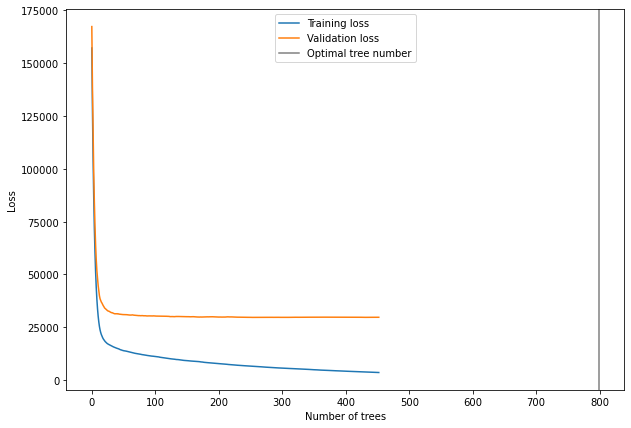

In [111]:
xgb_results = xgb.evals_result()

plt.figure(figsize=(10,7))
plt.plot(xgb_results["validation_0"]["rmse"], label="Training loss")
plt.plot(xgb_results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(799, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [112]:
xgb.best_ntree_limit

253

In [113]:
# 예측
xgb_pred = xgb.predict(x_val)

# 평가
print('MSE:', mean_squared_error(y_val, xgb_pred))
print('R2-score:', r2_score(y_val, xgb_pred))

MSE: 878280673.6837593
R2-score: 0.8928788353182252


### 튜닝 후 모델선언 (xgbr로 저장, 틀린 게 있을 수 있음 ㅠㅜ)

In [114]:
# 선언
# xgb = XGBRegressor(max_depth=3, n_estimators=55, random_state=2022), 진수가 수정 55 
xgbr = XGBRegressor(n_estimators=500, max_depth=3, objective='reg:squarederror', random_state=2022)

In [115]:
x_val.shape

(237, 218)

In [116]:
# 학습
xgbr.fit(x_train, y_train, eval_metric="rmse", eval_set=[(x_train, y_train), (x_val, y_val)], early_stopping_rounds=20, verbose= True)

[0]	validation_0-rmse:138576.96875	validation_1-rmse:149160.60938
[1]	validation_0-rmse:100427.10156	validation_1-rmse:111321.34375
[2]	validation_0-rmse:74186.82812	validation_1-rmse:86446.75781
[3]	validation_0-rmse:55889.32031	validation_1-rmse:68577.70312
[4]	validation_0-rmse:43300.36328	validation_1-rmse:55236.12500
[5]	validation_0-rmse:34843.02344	validation_1-rmse:47177.85938
[6]	validation_0-rmse:29467.51758	validation_1-rmse:42103.37500
[7]	validation_0-rmse:25885.08203	validation_1-rmse:38726.28906
[8]	validation_0-rmse:23418.34570	validation_1-rmse:36924.42188
[9]	validation_0-rmse:21696.34375	validation_1-rmse:35604.92969
[10]	validation_0-rmse:20405.25195	validation_1-rmse:34620.58203
[11]	validation_0-rmse:19537.95312	validation_1-rmse:33909.15625
[12]	validation_0-rmse:18843.84570	validation_1-rmse:32982.68750
[13]	validation_0-rmse:18334.22266	validation_1-rmse:32579.48633
[14]	validation_0-rmse:17963.72852	validation_1-rmse:32308.27734
[15]	validation_0-rmse:17622.10

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=2022,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

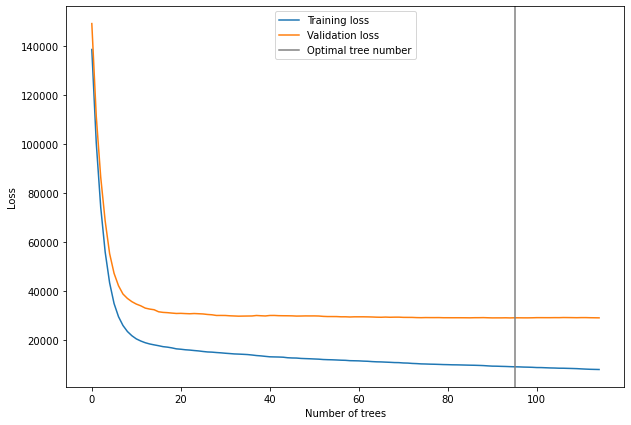

In [117]:
xgb_results = xgbr.evals_result()

plt.figure(figsize=(10,7))
plt.plot(xgb_results["validation_0"]["rmse"], label="Training loss")
plt.plot(xgb_results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(xgbr.best_ntree_limit, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [118]:
# from xgboost import plot_importance, plot_tree
# import graphviz
# import matplotlib.pyplot as plt
# from matplotlib.pylab import rcParams
# plt.style.use(['seaborn-whitegrid'])

AttributeError: module 'graphviz.backend' has no attribute 'ENCODING'

In [ ]:
# rcParams['figure.figsize']=80,80
# plot_tree(xgbr,num_trees=3)
# plt.show

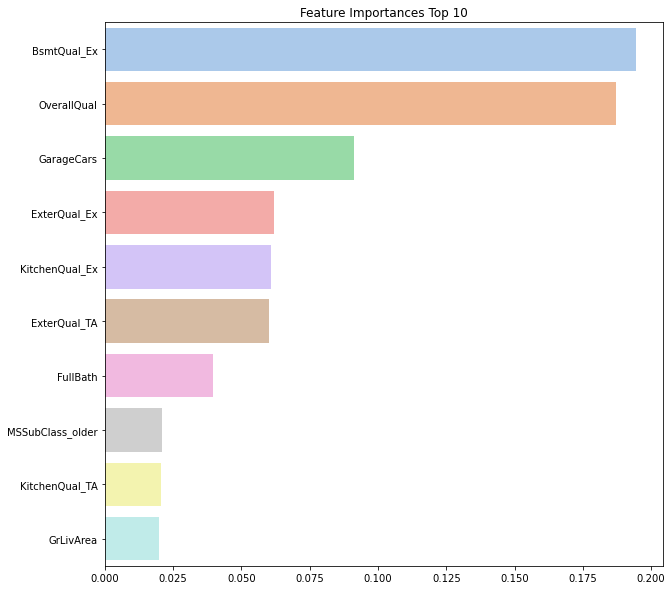

In [120]:
# 변수 중요도 시각화
feature_importance_values = xgb.feature_importances_

# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=x_train.columns)

# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=[10, 10])
plt.title('Feature Importances Top 10')
sns.barplot(x=feature_top20, y=feature_top20.index, palette = sns.color_palette("pastel"))
plt.show()

In [121]:
# 예측
xgbr_pred = xgbr.predict(x_val)

In [122]:
# 평가
print('MSE:', mean_squared_error(y_val, xgbr_pred))
print('R2-score:', r2_score(y_val, xgbr_pred))

MSE: 839323827.1650606
R2-score: 0.8976302808372402


In [123]:
# 결과저장
result_mse['XGBRegressor'] = mean_squared_error(y_val, xgbr_pred)
result_r2['XGBRegressor'] = r2_score(y_val, xgbr_pred)

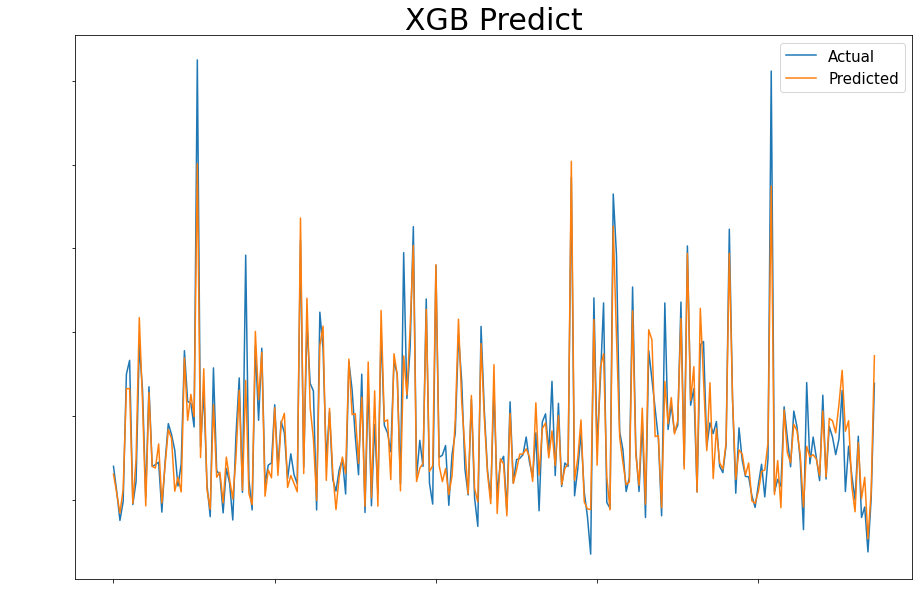

In [124]:
# 예측값, 실제값 시각화
plt.figure(figsize=(15, 10))
plt.plot(y_val.values, label='Actual')
plt.plot(xgbr_pred, label='Predicted')
plt.legend(fontsize=15)
plt.title('XGB Predict', fontdict = {'fontsize': 30})
plt.xticks(color='w') 
plt.yticks(color='w') 
plt.ylabel('SalePrice', color='w', size=20)
plt.show()

## Deep Learning Model

In [445]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [446]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model  # 시각화

### shape 확인

In [447]:
# shape 확인
x_train.shape, y_train.shape

((946, 233), (946,))

### DL1

In [448]:
## 모델링 - Functional API
# 세션 클리어
clear_session()

# 체인처럼 레이어 연결
il = Input(shape=(233,), name='input_layer')
# 51에 제일 인접한 2의 제곱수 32를 노드 수로 선택
hl = Dense(256, activation='relu', name='hidden_layer1')(il)
hl = Dense(256, activation='relu', name='hidden_layer2')(hl)
hl = Dense(128, activation='relu', name='hidden_layer3')(hl)
hl = Dense(128, activation='relu', name='hidden_layer4')(hl)
hl = Dense(64, activation='relu', name='hidden_layer5')(hl)
hl = Dense(64, activation='relu', name='hidden_layer6')(hl)
hl = Dense(32, activation='relu', name='hidden_layer7')(hl)
hl = Dense(32, activation='relu', name='hidden_layer8')(hl)
hl = Dense(16, activation='relu', name='hidden_layer9')(hl)
ol = Dense(1, name='output_layer')(hl)

# 모델선언(시작과 끝 지정)
dl1 = Model(il, ol)

# 컴파일
dl1.compile(loss=keras.losses.mean_squared_error,
             optimizer=Adam(learning_rate=0.01))

# 모델요약
dl1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 233)]             0         
                                                                 
 hidden_layer1 (Dense)       (None, 256)               59904     
                                                                 
 hidden_layer2 (Dense)       (None, 256)               65792     
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 hidden_layer4 (Dense)       (None, 128)               16512     
                                                                 
 hidden_layer5 (Dense)       (None, 64)                8256      
                                                                 
 hidden_layer6 (Dense)       (None, 64)                4160  

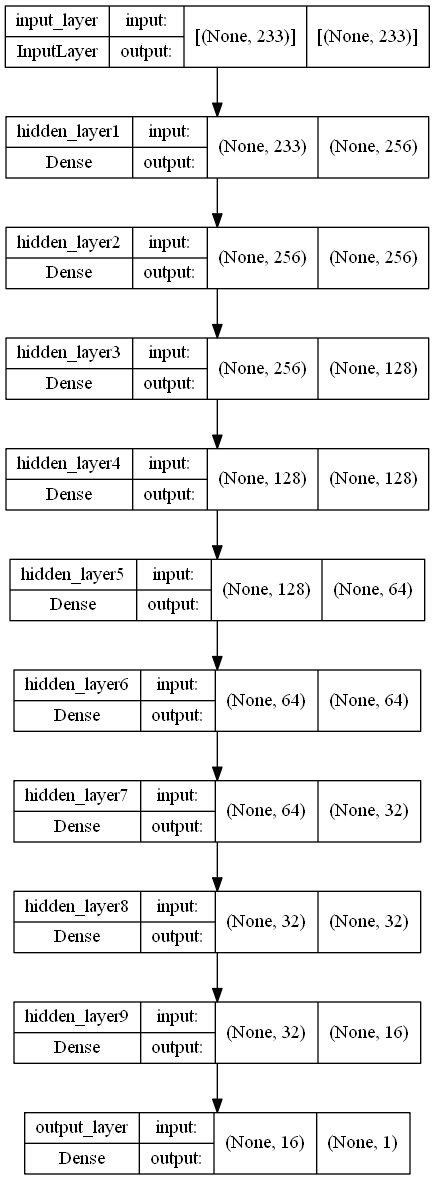

In [449]:
# 시각화
plot_model(dl1, show_shapes=True)

In [450]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=10,
                   verbose=1,
                   restore_best_weights=True)

In [451]:
# dl1 학습하기
dl1.fit(x_train, y_train, validation_split=0.2, epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
24/24 [==============================] - 1s 16ms/step - loss: 36582309888.0000 - val_loss: 4358181376.0000
Epoch 2/1000
24/24 [==============================] - 0s 5ms/step - loss: 6959056384.0000 - val_loss: 3358108160.0000
Epoch 3/1000
24/24 [==============================] - 0s 5ms/step - loss: 2631249152.0000 - val_loss: 1489025024.0000
Epoch 4/1000
24/24 [==============================] - 0s 5ms/step - loss: 1793512064.0000 - val_loss: 1228229120.0000
Epoch 5/1000
24/24 [==============================] - 0s 4ms/step - loss: 1572601728.0000 - val_loss: 1207226112.0000
Epoch 6/1000
24/24 [==============================] - 0s 5ms/step - loss: 1714047616.0000 - val_loss: 1629293824.0000
Epoch 7/1000
24/24 [==============================] - 0s 5ms/step - loss: 1766222208.0000 - val_loss: 1097590400.0000
Epoch 8/1000
24/24 [==============================] - 0s 5ms/step - loss: 1606478976.0000 - val_loss: 1589080064.0000
Epoch 9/1000
24/24 [==============================] - 

24/24 [==============================] - 0s 5ms/step - loss: 717775040.0000 - val_loss: 928478592.0000
Epoch 71/1000
24/24 [==============================] - 0s 5ms/step - loss: 729075008.0000 - val_loss: 677826560.0000
Epoch 72/1000
24/24 [==============================] - 0s 5ms/step - loss: 730176704.0000 - val_loss: 747056960.0000
Epoch 72: early stopping


In [452]:
# dl1 예측하기
dl1_pred = dl1.predict(x_val)

In [453]:
# dl1 평가하기  # cf) dropout 쓰면 성능 더 낮아짐
print('MSE:', mean_squared_error(y_val, dl1_pred))
print('R2:', r2_score(y_val, dl1_pred))

MSE: 1066678960.4209471
R2: 0.8699004816961515


In [454]:
# 결과저장
result_mse['dl1'] = mean_squared_error(y_val, dl1_pred)
result_r2['dl1'] = r2_score(y_val, dl1_pred)

### DL2

In [460]:
## Functional API
# 세션 클리어
clear_session()

# 모델의 레이어를 엮기
il = Input(shape=(233,), name='input_layer')
hl = Dense(512, activation='relu', name='hidden_layer1')(il)
hl = Dense(256, activation='relu', name='hidden_layer2')(hl)
hl = Dense(128, activation='relu', name='hidden_layer3')(hl)
hl = Dense(64, activation='relu', name='hidden_layer4')(hl)
hl = Dense(64, activation='relu', name='hidden_layer5')(hl)
hl = Dense(32, activation='relu', name='hidden_layer6')(hl)
hl = Dense(32, activation='relu', name='hidden_layer7')(hl)
hl = Dense(16, activation='relu', name='hidden_layer8')(hl)
ol = Dense(1, name='output_layer')(hl)

# 모델의 처음과 끝 지정
dl2 = Model(il, ol)

# 컴파일
dl2.compile(loss='mse', optimizer = 'adam')

# 요약
dl2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 233)]             0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               119808    
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 hidden_layer4 (Dense)       (None, 64)                8256      
                                                                 
 hidden_layer5 (Dense)       (None, 64)                4160      
                                                                 
 hidden_layer6 (Dense)       (None, 32)                2080  

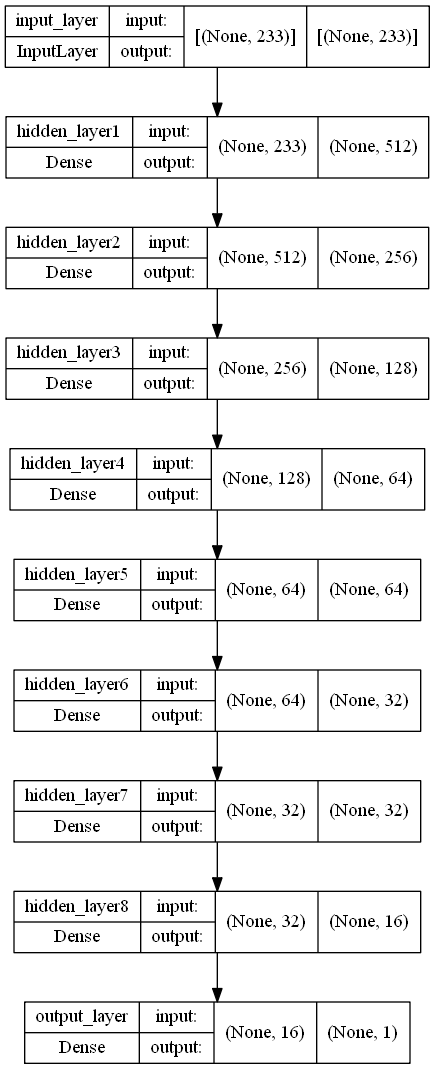

In [461]:
# 시각화

plot_model(dl2, show_shapes=True, show_layer_names=True)

In [462]:
# 학습
dl2.fit(x_train, y_train,  epochs=1000, verbose=1, validation_split=0.15, callbacks=[es])

Epoch 1/1000
26/26 [==============================] - 1s 19ms/step - loss: 30484688896.0000 - val_loss: 8104745984.0000
Epoch 2/1000
26/26 [==============================] - 0s 5ms/step - loss: 6684517376.0000 - val_loss: 4275394560.0000
Epoch 3/1000
26/26 [==============================] - 0s 5ms/step - loss: 4536158208.0000 - val_loss: 3302879744.0000
Epoch 4/1000
26/26 [==============================] - 0s 5ms/step - loss: 3064548096.0000 - val_loss: 2523646464.0000
Epoch 5/1000
26/26 [==============================] - 0s 4ms/step - loss: 2325913088.0000 - val_loss: 2286869504.0000
Epoch 6/1000
26/26 [==============================] - 0s 4ms/step - loss: 1935831424.0000 - val_loss: 1542232704.0000
Epoch 7/1000
26/26 [==============================] - 0s 4ms/step - loss: 1620844672.0000 - val_loss: 1863690112.0000
Epoch 8/1000
26/26 [==============================] - 0s 5ms/step - loss: 1728597376.0000 - val_loss: 1482315264.0000
Epoch 9/1000
26/26 [==============================] - 

Epoch 70/1000
26/26 [==============================] - 0s 4ms/step - loss: 1221487232.0000 - val_loss: 1164936448.0000
Epoch 71/1000
26/26 [==============================] - 0s 4ms/step - loss: 1227735168.0000 - val_loss: 1349611264.0000
Epoch 72/1000
26/26 [==============================] - 0s 5ms/step - loss: 1205920384.0000 - val_loss: 1056518464.0000
Epoch 73/1000
26/26 [==============================] - 0s 6ms/step - loss: 1158958848.0000 - val_loss: 984743488.0000
Epoch 74/1000
26/26 [==============================] - 0s 4ms/step - loss: 1170944000.0000 - val_loss: 971298240.0000
Epoch 75/1000
26/26 [==============================] - 0s 4ms/step - loss: 1124785536.0000 - val_loss: 1024120896.0000
Epoch 76/1000
26/26 [==============================] - 0s 5ms/step - loss: 1124381184.0000 - val_loss: 1171980288.0000
Epoch 77/1000
26/26 [==============================] - 0s 5ms/step - loss: 1115586944.0000 - val_loss: 988492672.0000
Epoch 78/1000
26/26 [==============================

26/26 [==============================] - 0s 4ms/step - loss: 698524992.0000 - val_loss: 733060736.0000
Epoch 140/1000
26/26 [==============================] - 0s 5ms/step - loss: 688135232.0000 - val_loss: 719548480.0000
Epoch 141/1000
26/26 [==============================] - 0s 5ms/step - loss: 655586176.0000 - val_loss: 706092736.0000
Epoch 142/1000
26/26 [==============================] - 0s 5ms/step - loss: 763915328.0000 - val_loss: 826137984.0000
Epoch 142: early stopping


In [463]:
# 예측하기
dl2_pred = dl2.predict(x_val)

In [464]:
print('MSE:', mean_squared_error(y_val, dl2_pred))
print('R2:', r2_score(y_val, dl2_pred))

MSE: 1048739792.335017
R2: 0.872088466285095


In [465]:
# 결과저장
result_mse['dl2'] = mean_squared_error(y_val, dl2_pred)
result_r2['dl2'] = r2_score(y_val, dl2_pred)

### DL3

In [466]:
# 세션 클리어
clear_session()

# 체인처럼 레이어 연결
il = Input(shape=(233,), name='input_layer')
hl = Dense(128, activation='relu', name='hidden_layer1')(il)
hl = Dense(128, activation='relu', name='hidden_layer2')(hl)
hl = Dense(128, activation='relu', name='hidden_layer3')(hl)
hl = Dense(128, activation='relu', name='hidden_layer4')(hl)
hl = Dense(128, activation='relu', name='hidden_layer5')(hl)
ol = Dense(1, name='output_layer')(hl)

# 모델선언(시작과 끝 지정)
dl3 = Model(il, ol)

# 컴파일
dl3.compile(loss = 'mse', optimizer=Adam())

# 모델요약
dl3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 233)]             0         
                                                                 
 hidden_layer1 (Dense)       (None, 128)               29952     
                                                                 
 hidden_layer2 (Dense)       (None, 128)               16512     
                                                                 
 hidden_layer3 (Dense)       (None, 128)               16512     
                                                                 
 hidden_layer4 (Dense)       (None, 128)               16512     
                                                                 
 hidden_layer5 (Dense)       (None, 128)               16512     
                                                                 
 output_layer (Dense)        (None, 1)                 129   

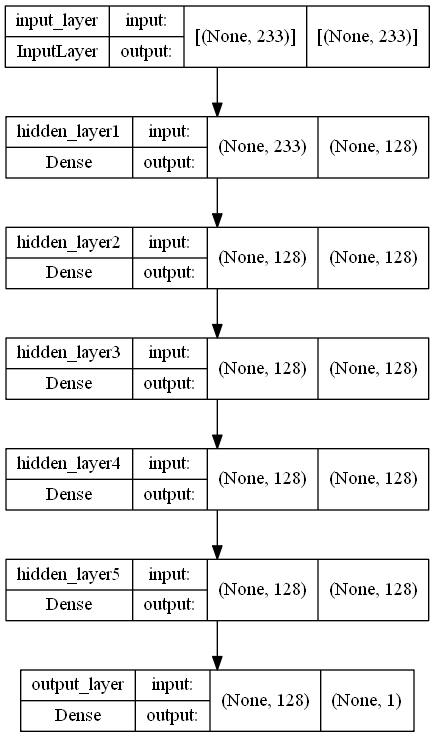

In [467]:
# 시각화
plot_model(dl3, show_shapes=True)

In [468]:
dl3.fit(x_train, y_train, validation_split=0.2,
          epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
24/24 [==============================] - 1s 12ms/step - loss: 31773325312.0000 - val_loss: 17244502016.0000
Epoch 2/1000
24/24 [==============================] - 0s 5ms/step - loss: 8968232960.0000 - val_loss: 6390307840.0000
Epoch 3/1000
24/24 [==============================] - 0s 4ms/step - loss: 5406592512.0000 - val_loss: 3927928320.0000
Epoch 4/1000
24/24 [==============================] - 0s 4ms/step - loss: 4081147904.0000 - val_loss: 2914457344.0000
Epoch 5/1000
24/24 [==============================] - 0s 4ms/step - loss: 3188045568.0000 - val_loss: 2332831744.0000
Epoch 6/1000
24/24 [==============================] - 0s 4ms/step - loss: 2576072448.0000 - val_loss: 1864641792.0000
Epoch 7/1000
24/24 [==============================] - 0s 4ms/step - loss: 2083241856.0000 - val_loss: 1629765760.0000
Epoch 8/1000
24/24 [==============================] - 0s 4ms/step - loss: 1851405184.0000 - val_loss: 1375325952.0000
Epoch 9/1000
24/24 [==============================] -

Epoch 70/1000
24/24 [==============================] - 0s 3ms/step - loss: 1376524032.0000 - val_loss: 971503616.0000
Epoch 71/1000
24/24 [==============================] - 0s 4ms/step - loss: 1309982592.0000 - val_loss: 950715904.0000
Epoch 72/1000
24/24 [==============================] - 0s 4ms/step - loss: 1328187392.0000 - val_loss: 1012564224.0000
Epoch 73/1000
24/24 [==============================] - 0s 4ms/step - loss: 1264864000.0000 - val_loss: 965088128.0000
Epoch 74/1000
24/24 [==============================] - 0s 4ms/step - loss: 1246190592.0000 - val_loss: 976585216.0000
Epoch 75/1000
24/24 [==============================] - 0s 4ms/step - loss: 1254950016.0000 - val_loss: 1080969728.0000
Epoch 76/1000
24/24 [==============================] - 0s 4ms/step - loss: 1263941120.0000 - val_loss: 1020960960.0000
Epoch 77/1000
24/24 [==============================] - 0s 4ms/step - loss: 1267132672.0000 - val_loss: 924275392.0000
Epoch 78/1000
24/24 [==============================] 

24/24 [==============================] - 0s 4ms/step - loss: 999632768.0000 - val_loss: 706475904.0000
Epoch 140/1000
24/24 [==============================] - 0s 4ms/step - loss: 883272448.0000 - val_loss: 716160576.0000
Epoch 141/1000
24/24 [==============================] - 0s 4ms/step - loss: 902713472.0000 - val_loss: 858498432.0000
Epoch 142/1000
24/24 [==============================] - 0s 4ms/step - loss: 877342464.0000 - val_loss: 695770432.0000
Epoch 143/1000
24/24 [==============================] - 0s 4ms/step - loss: 910828672.0000 - val_loss: 668809088.0000
Epoch 144/1000
24/24 [==============================] - 0s 4ms/step - loss: 864515520.0000 - val_loss: 689300096.0000
Epoch 145/1000
24/24 [==============================] - 0s 4ms/step - loss: 882180032.0000 - val_loss: 877978176.0000
Epoch 146/1000
24/24 [==============================] - 0s 3ms/step - loss: 862497216.0000 - val_loss: 678901632.0000
Epoch 147/1000
24/24 [==============================] - 0s 4ms/step - l

In [469]:
# 예측하기
dl3_pred = dl3.predict(x_val)

In [470]:
# 평가하기
print('MSE :' , mean_squared_error(y_val, dl3_pred))
print('R2_score :' , r2_score(y_val, dl3_pred))

MSE : 1097416161.6157653
R2_score : 0.8661515607763312


In [471]:
# 결과저장
result_mse['dl3'] = mean_squared_error(y_val, dl3_pred)
result_r2['dl3'] = r2_score(y_val, dl3_pred)

## Locally Connected DL

### DL4
**기준**
- A) 지상&주방&난방(벽난로)&풀&울타리 (피트, 개수)
- B) 지하&차고 (피트, 개수)
- C) 자재 및 상태(퀄리티), 유형(형태)
- D) 날짜, 평탄도, 부지구성, 위치

In [475]:
# 지상&주방&난방(벽난로)&풀&울타리 (피트, 개수)
A = ['LotFrontage', 'LotArea', 'MasVnrArea', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
    'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
    'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'Condition1_nag', 'Condition1_pos',
    'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_Wall', 'Heating_OthW', 'HeatingQC_Gd',
     'HeatingQC_TA', 'HeatingQC_Fa', 'HeatingQC_Po', 'CentralAir_N', 'Electrical_FuseF', 'Electrical_FuseA',
     'Electrical_FuseP', 'Electrical_Mix', 'KitchenAbvGr_2개 이상', 'KitchenQual_TA', 'KitchenQual_Ex',
     'KitchenQual_Fa', 'KitchenQual_Po', 'TotRmsAbvGrd_5~8', 'TotRmsAbvGrd_9~',
    'FireplaceQu_TA', 'FireplaceQu_Gd', 'FireplaceQu_Ex', 'FireplaceQu_Fa', 'FireplaceQu_Po',
    'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_Ex', 'PoolQC_TA', 'Fence_MnPrv', 'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnWw',
    'WoodDeckSF_cut_200미만', 'WoodDeckSF_cut_200이상', 'OpenPorchSF_cut_100미만', 'OpenPorchSF_cut_100이상',
    'EnclosedPorch_cut_100미만', 'EnclosedPorch_cut_200미만', 'EnclosedPorch_cut_300미만', 'EnclosedPorch_cut_300이상']

B = ['BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea',
    'LotShape_ir', 'BsmtQual_TA', 'BsmtQual_Ex', 'BsmtQual_Na', 'BsmtQual_Fa', 'BsmtQual_Po', 'BsmtCond_Gd',
     'BsmtCond_Na', 'BsmtCond_Fa', 'BsmtCond_Po', 'BsmtCond_Ex', 'BsmtExposure_Gd', 'BsmtExposure_Mn',
     'BsmtExposure_Av', 'BsmtExposure_Na', 'BsmtFinType1_ALQ', 'BsmtFinType1_Unf', 'BsmtFinType1_Rec',
     'BsmtFinType1_NA', 'BsmtFinType1_LwQ', 'BsmtFinType1_BLQ', 'BsmtFinType2_NA', 'BsmtFinType2_Rec',
     'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_ALQ',
    'GarageType_Dt', 'GarageType_Others', 'GarageType_No',
    'GarageFinish_Unf', 'GarageFinish_Fin', 'GarageFinish_No', 'GarageQual_Fa', 'GarageQual_Gd',
     'GarageQual_No', 'GarageQual_Ex', 'GarageQual_Po', 'GarageCond_Po', 'GarageCond_No', 'GarageCond_Gd',
    'BsmtFinSF1_grp_500미만', 'BsmtFinSF1_grp_1000미만', 'BsmtFinSF1_grp_1500미만', 'BsmtFinSF1_grp_1500이상',
     'BsmtUnfSF_grp_500미만', 'BsmtUnfSF_grp_1000미만', 'BsmtUnfSF_grp_1500미만', 'BsmtUnfSF_grp_2000미만',
     'BsmtUnfSF_grp_2000이상']

C = ['OverallQual', 'MSSubClass_older', 'MSSubClass_other', 'MSSubClass_unf', 'MSSubClass_split',
    'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RP', 'MSZoning_RM', 'MSZoning_I',
    'Exterior1st_VinylSd', 'Exterior1st_MetalSd', 'Exterior1st_Wood', 'Exterior1st_Panull', 'Exterior1st_Shn',
     'Exterior1st_Brick', 'Exterior1st_Other', 'Exterior2nd_VinylSd', 'Exterior2nd_HdBoard',
     'Exterior2nd_MetalSd', 'Exterior2nd_Wood', 'Exterior2nd_Shn', 'Exterior2nd_Brick', 'Exterior2nd_Other',
    'MasVnrType_None', 'MasVnrType_Stone', 'MasVnrType_BrkCmn', 'MasVnrType_CBlock',
    'ExterQual_TA', 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Po',
     'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_Ex',
    'Foundation_CBlock', 'Foundation_BrkTil', 'Foundation_Wood', 'Foundation_Slab', 'Foundation_Stone',
     'Functional_Min', 'Functional_Maj', 'Functional_Sev', 'Functional_Sal', 'PavedDrive_N', 'PavedDrive_P',
     'SaleType_New', 'SaleType_COD', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_CWD', 'SaleType_ConLw',
     'SaleType_Con', 'SaleType_Oth', 'SaleType_VWD', 'SaleCondition_Abnorml', 'SaleCondition_Partial',
     'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family']

D = ['LotConfig_FR2', 'LotConfig_Corner', 'LotConfig_FR3', 'LotConfig_CulDSac',
    'Neighborhood_Veenker', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_Mitchel', 'Neighborhood_Somerst',
     'Neighborhood_OldTown', 'Neighborhood_BrkSide', 'Neighborhood_Sawyer', 'Neighborhood_NridgHt', 'Neighborhood_SawyerW',
     'Neighborhood_NAmes', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Edwards', 'Neighborhood_Timber',
     'Neighborhood_StoneBr', 'Neighborhood_ClearCr', 'Neighborhood_Gilbert', 'Neighborhood_NWAmes', 'Neighborhood_NPkVill',
     'Neighborhood_Blmngtn', 'Neighborhood_BrDale', 'Neighborhood_SWISU', 'Neighborhood_Blueste',
    'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_TwnhsE', 'BldgType_Twnhs',
    'HouseStyle_sto1', 'HouseStyle_unf', 'RoofStyle_Hip', 'RoofStyle_Others', 'RoofMatl_Wood', 'RoofMatl_Others',
    'GarageYrBlt_1900년대', 'GarageYrBlt_1910년대', 'GarageYrBlt_1920년대', 'GarageYrBlt_1930년대', 'GarageYrBlt_1940년대',
     'GarageYrBlt_1950년대', 'GarageYrBlt_1960년대', 'GarageYrBlt_1970년대', 'GarageYrBlt_1980년대', 'GarageYrBlt_1990년대',
     'GarageYrBlt_2000년대', 'YearBuilt_grp_~1950', 'YearBuilt_grp_~2000', 'YearBuilt_grp_2000~', 'YearRemodAdd_grp_~2000',
     'YearRemodAdd_grp_2000~',]

In [479]:
tr_A = x_train.loc[ : , A]
tr_B = x_train.loc[ : , B]
tr_C = x_train.loc[ : , C]
tr_D = x_train.loc[ : , D]

In [481]:
val_A = x_val.loc[ : , A]
val_B = x_val.loc[ : , B]
val_C = x_val.loc[ : , C]
val_D = x_val.loc[ : , D]

In [482]:
tr_A.shape, tr_B.shape, tr_C.shape, tr_D.shape 

((946, 59), (946, 57), (946, 63), (946, 54))

In [483]:
val_A.shape, val_B.shape, val_C.shape, val_D.shape 

((237, 59), (237, 57), (237, 63), (237, 54))

In [484]:
x_train.shape, y_train.shape

((946, 233), (946,))

In [491]:
## 모델링
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기 : input 2개!
il_A = Input(shape=(59,) )
hl_A = Dense(32, activation='relu')(il_A)

il_B = Input(shape=(57,) )
hl_B = Dense(32, activation='relu')(il_B)

il_C = Input(shape=(63,) )
hl_C = Dense(32, activation='relu')(il_C)

il_D = Input(shape=(54,) )
hl_D = Dense(32, activation='relu')(il_D)

add_l = Add()([hl_A, hl_B, hl_C, hl_D])

il = Input(shape=(233,) )

co_l = Concatenate()([il, add_l])
hl = Dense(256, activation='relu')(co_l)
ol = Dense(1)(hl)

# 3. 모델 시작과 끝 지정
dl4 = Model([il_A, il_B, il_C, il_D, il], ol)

# 4. 모델 컴파일
dl4.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

dl4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 59)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 57)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 63)]         0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 54)]         0           []                               
                                                                                              

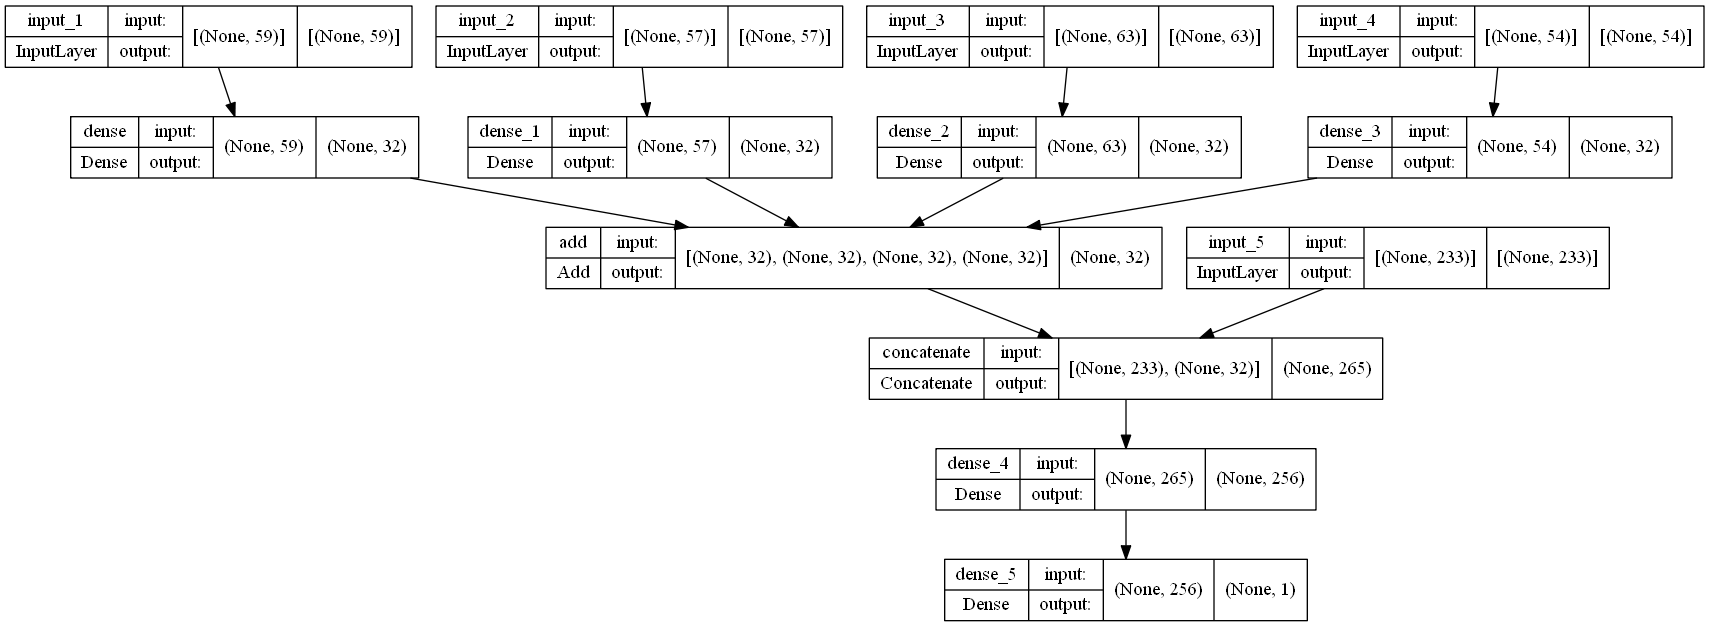

In [492]:
# 시각화
plot_model(dl4, show_shapes=True)

In [493]:
# 학습하기
dl4.fit([tr_A, tr_B, tr_C, tr_D, x_train],
          y_train, validation_split=0.3, epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
21/21 [==============================] - 1s 33ms/step - loss: 19610349568.0000 - val_loss: 4623689216.0000
Epoch 2/1000
21/21 [==============================] - 0s 5ms/step - loss: 4365411328.0000 - val_loss: 3290566656.0000
Epoch 3/1000
21/21 [==============================] - 0s 5ms/step - loss: 2938605568.0000 - val_loss: 2679140864.0000
Epoch 4/1000
21/21 [==============================] - 0s 5ms/step - loss: 2274846208.0000 - val_loss: 2091454336.0000
Epoch 5/1000
21/21 [==============================] - 0s 5ms/step - loss: 1937808000.0000 - val_loss: 1828405504.0000
Epoch 6/1000
21/21 [==============================] - 0s 8ms/step - loss: 1713817856.0000 - val_loss: 1660881792.0000
Epoch 7/1000
21/21 [==============================] - 0s 5ms/step - loss: 1641751936.0000 - val_loss: 1596336896.0000
Epoch 8/1000
21/21 [==============================] - 0s 6ms/step - loss: 1596010240.0000 - val_loss: 1609404416.0000
Epoch 9/1000
21/21 [==============================] - 

21/21 [==============================] - 0s 4ms/step - loss: 715703040.0000 - val_loss: 816241536.0000
Epoch 71/1000
21/21 [==============================] - 0s 4ms/step - loss: 601729088.0000 - val_loss: 704918208.0000
Epoch 72/1000
21/21 [==============================] - 0s 6ms/step - loss: 614365120.0000 - val_loss: 677489152.0000
Epoch 73/1000
21/21 [==============================] - 0s 4ms/step - loss: 615793216.0000 - val_loss: 672283520.0000
Epoch 74/1000
21/21 [==============================] - 0s 4ms/step - loss: 577303104.0000 - val_loss: 674621568.0000
Epoch 75/1000
21/21 [==============================] - 0s 5ms/step - loss: 576855360.0000 - val_loss: 669138304.0000
Epoch 76/1000
21/21 [==============================] - 0s 4ms/step - loss: 562868608.0000 - val_loss: 705773760.0000
Epoch 77/1000
21/21 [==============================] - 0s 6ms/step - loss: 573706368.0000 - val_loss: 742158528.0000
Epoch 78/1000
21/21 [==============================] - 0s 4ms/step - loss: 574

In [494]:
# 예측하기
dl4_pred = dl4.predict([val_A, val_B, val_C, val_D, x_val])

In [495]:
# 평가하기
print('MSE:', mean_squared_error(y_val, dl4_pred))
# print('RMSE: ', math.sqrt(mean_squared_error(y_val, y_pred)))
print('R2-Score:', r2_score(y_val, dl4_pred))

MSE: 847881447.0429753
R2-Score: 0.8965865345318806


In [496]:
# 결과저장
result_mse['dl4'] = mean_squared_error(y_val, dl4_pred)
result_r2['dl4'] = r2_score(y_val, dl4_pred)

### DL5

In [503]:
# 집유형
house = ['GrLivArea', 'BedroomAbvGr', 'Fireplaces', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
        'MSSubClass_older', 'MSSubClass_other', 'MSSubClass_unf', 'MSSubClass_split', 'MSZoning_C (all)',
         'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RP', 'MSZoning_RM', 'MSZoning_I', 'LotShape_ir',
         'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_Corner', 'LotConfig_FR3',
         'LotConfig_CulDSac', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_TwnhsE', 'BldgType_Twnhs',
         'HouseStyle_sto1', 'HouseStyle_unf', 'RoofStyle_Hip', 'RoofStyle_Others',
        'ExterQual_TA', 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Po', 'ExterCond_Fa', 'ExterCond_Gd',
         'ExterCond_Po', 'ExterCond_Ex', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_Wall', 
         'Heating_OthW', 'HeatingQC_Gd', 'HeatingQC_TA', 'HeatingQC_Fa', 'HeatingQC_Po', 'CentralAir_N', 'Electrical_FuseF',
         'Electrical_FuseA', 'Electrical_FuseP', 'Electrical_Mix', 'KitchenAbvGr_2개 이상', 'KitchenQual_TA',
         'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Po', 'TotRmsAbvGrd_5~8', 'TotRmsAbvGrd_9~',
        'Functional_Min', 'Functional_Maj', 'Functional_Sev', 'Functional_Sal', 'FireplaceQu_TA', 'FireplaceQu_Gd',
         'FireplaceQu_Ex', 'FireplaceQu_Fa', 'FireplaceQu_Po', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_Ex', 'PoolQC_TA',
         'Fence_MnPrv', 'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnWw', 'YearBuilt_grp_~1950', 'YearBuilt_grp_~2000',
         'YearBuilt_grp_2000~', 'YearRemodAdd_grp_~2000', 'YearRemodAdd_grp_2000~',
        'OpenPorchSF_cut_100미만', 'OpenPorchSF_cut_100이상', 'EnclosedPorch_cut_100미만', 'EnclosedPorch_cut_200미만',
         'EnclosedPorch_cut_300미만', 'EnclosedPorch_cut_300이상']

# 집주변
near_h =['LotFrontage', 'LotArea', 'Condition1_nag', 'Condition1_pos', 'PavedDrive_N', 'PavedDrive_P']

# 집재료
mat = ['OverallQual', 'MasVnrArea', 'WoodDeckSF', 'RoofMatl_Wood', 'RoofMatl_Others', 'Exterior1st_VinylSd',
       'Exterior1st_MetalSd', 'Exterior1st_Wood', 'Exterior1st_Panull', 'Exterior1st_Shn', 'Exterior1st_Brick',
       'Exterior1st_Other', 'Exterior2nd_VinylSd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_Wood',
       'Exterior2nd_Shn', 'Exterior2nd_Brick', 'Exterior2nd_Other', 'MasVnrType_None', 'MasVnrType_Stone',
       'MasVnrType_BrkCmn', 'MasVnrType_CBlock', 'Foundation_CBlock', 'Foundation_BrkTil', 'Foundation_Wood',
       'Foundation_Slab', 'Foundation_Stone', 'WoodDeckSF_cut_200미만', 'WoodDeckSF_cut_200이상']


# 화장실
bath = ['FullBath', 'HalfBath',]

# 지역
neigh=['Neighborhood_Veenker', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_Mitchel',
       'Neighborhood_Somerst', 'Neighborhood_OldTown', 'Neighborhood_BrkSide', 'Neighborhood_Sawyer',
       'Neighborhood_NridgHt', 'Neighborhood_SawyerW', 'Neighborhood_NAmes', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Edwards', 'Neighborhood_Timber', 'Neighborhood_StoneBr',
       'Neighborhood_ClearCr', 'Neighborhood_Gilbert', 'Neighborhood_NWAmes', 'Neighborhood_NPkVill',
       'Neighborhood_Blmngtn', 'Neighborhood_BrDale', 'Neighborhood_SWISU', 'Neighborhood_Blueste']

# 지하실
bsmt=['BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual_TA', 'BsmtQual_Ex',
      'BsmtQual_Na', 'BsmtQual_Fa', 'BsmtQual_Po', 'BsmtCond_Gd', 'BsmtCond_Na', 'BsmtCond_Fa', 'BsmtCond_Po',
      'BsmtCond_Ex', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_Av', 'BsmtExposure_Na', 'BsmtFinType1_ALQ',
      'BsmtFinType1_Unf', 'BsmtFinType1_Rec', 'BsmtFinType1_NA', 'BsmtFinType1_LwQ', 'BsmtFinType1_BLQ',
      'BsmtFinType2_NA', 'BsmtFinType2_Rec', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ',
      'BsmtFinType2_ALQ', 'BsmtFinSF1_grp_500미만', 'BsmtFinSF1_grp_1000미만', 'BsmtFinSF1_grp_1500미만',
      'BsmtFinSF1_grp_1500이상', 'BsmtUnfSF_grp_500미만', 'BsmtUnfSF_grp_1000미만', 'BsmtUnfSF_grp_1500미만',
      'BsmtUnfSF_grp_2000미만', 'BsmtUnfSF_grp_2000이상']

# 차고
gar=['GarageCars', 'GarageArea', 'GarageType_Dt', 'GarageType_Others', 'GarageType_No', 'GarageYrBlt_1900년대',
     'GarageYrBlt_1910년대', 'GarageYrBlt_1920년대', 'GarageYrBlt_1930년대', 'GarageYrBlt_1940년대',
     'GarageYrBlt_1950년대', 'GarageYrBlt_1960년대', 'GarageYrBlt_1970년대', 'GarageYrBlt_1980년대',
     'GarageYrBlt_1990년대', 'GarageYrBlt_2000년대', 'GarageFinish_Unf', 'GarageFinish_Fin', 'GarageFinish_No',
     'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_No', 'GarageQual_Ex', 'GarageQual_Po', 'GarageCond_Po',
     'GarageCond_No', 'GarageCond_Gd']

# 판매관련
sale=['SaleType_New', 'SaleType_COD', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_CWD', 'SaleType_ConLw',
      'SaleType_Con', 'SaleType_Oth', 'SaleType_VWD', 'SaleCondition_Abnorml', 'SaleCondition_Partial',
      'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family']


In [506]:
# 집 내부 요인
# house : 집 스타일, 집 건설연도, 집 옵션 등 집의 유형이나 옵션 관련을 묶음
tr_x_house= x_train.loc[:,house ]
# mat : 집 재료를 묶음
tr_x_mat= x_train.loc[:,mat ]
# bath : 화장실 관련 묶음
tr_x_bath= x_train.loc[:,bath ]
# bsmt : 지하실 관련 묶음
tr_x_bsmt= x_train.loc[:,bsmt ]
# gar : 차고를 묶음
tr_x_gar= x_train.loc[:,gar ]

# 집 외부 요인
# nearh : 집 주변 상태를 묶음
tr_x_nearh= x_train.loc[:,near_h ]
# neigh : 지역을 묶음
tr_x_neigh= x_train.loc[:,neigh ]
# sale : 판매관련을 묶음
tr_x_sale= x_train.loc[:,sale ]

In [507]:
# 집 내부 요인
# house : 집 스타일, 집 건설연도, 집 옵션 등 집의 유형이나 옵션 관련을 묶음
val_x_house= x_val.loc[:,house ]
# mat : 집 재료를 묶음
val_x_mat= x_val.loc[:,mat ]
# bath : 화장실 관련 묶음
val_x_bath= x_val.loc[:,bath ]
# bsmt : 지하실 관련 묶음
val_x_bsmt= x_val.loc[:,bsmt ]
# gar : 차고를 묶음
val_x_gar= x_val.loc[:,gar ]

# 집 외부 요인
# nearh : 집 주변 상태를 묶음
val_x_nearh= x_val.loc[:,near_h ]
# neigh : 지역을 묶음
val_x_neigh= x_val.loc[:,neigh ]
# sale : 판매관련을 묶음
val_x_sale= x_val.loc[:,sale ]

### shape 확인

In [508]:
tr_x_house.shape, tr_x_mat.shape, tr_x_bath.shape, tr_x_bsmt.shape, tr_x_gar.shape, tr_x_nearh.shape, tr_x_neigh.shape,  tr_x_sale.shape

((946, 90),
 (946, 30),
 (946, 2),
 (946, 40),
 (946, 27),
 (946, 6),
 (946, 24),
 (946, 14))

x_train, x_val, y_train, y_val

In [509]:
val_x_house.shape, val_x_mat.shape, val_x_bath.shape, val_x_bsmt.shape, val_x_gar.shape, val_x_nearh.shape, val_x_neigh.shape,  val_x_sale.shape

((237, 90),
 (237, 30),
 (237, 2),
 (237, 40),
 (237, 27),
 (237, 6),
 (237, 24),
 (237, 14))

In [513]:
## 모델링 - Functional API
# 세션 클리어
clear_session()

# 체인처럼 레이어 연결
il_house = Input(shape=(90,), name='input_house')
hl_house = Dense(128, activation='relu')(il_house)

il_mat = Input(shape=(30,), name='input_mat')
hl_mat = Dense(128, activation='relu')(il_mat)

il_bath = Input(shape=(2,), name='input_bath')
hl_bath = Dense(128, activation='relu')(il_bath)

il_bsmt = Input(shape=(40,), name='input_bsmt')
hl_bsmt = Dense(128, activation='relu')(il_bsmt)

il_gar = Input(shape=(27,), name='input_gar')
hl_gar = Dense(128, activation='relu')(il_gar)

il_nearh = Input(shape=(6,), name='input_nearh')
hl_nearh = Dense(128, activation='relu')(il_nearh)

il_neigh = Input(shape=(24,), name='input_neigh')
hl_neigh = Dense(128, activation='relu')(il_neigh)

il_sale = Input(shape=(14,), name='input_sale')
hl_sale = Dense(128, activation='relu')(il_sale)

# hidden layer add : 내부요인과 외부요인으로 구분하여 묶고자 함.
add_1 = Add()([hl_house,hl_mat,hl_bath,hl_bsmt,hl_gar])
add_2 = Add()([hl_nearh,hl_neigh,hl_sale])

# add끼리 연결
cl = Concatenate()([add_1,add_2])
hl = Dense(64, activation='relu')(cl)
hl = Dense(32, activation='relu')(hl)
ol = Dense(1)(hl)

# 모델선언(시작과 끝 지정)
dl5 = Model([il_house,il_mat,il_bath,il_bsmt,il_gar,il_nearh,il_neigh,il_sale], ol)
dl5.compile(loss='mse', optimizer=Adam(0.01))

# 5. 요약
dl5.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_house (InputLayer)       [(None, 90)]         0           []                               
                                                                                                  
 input_mat (InputLayer)         [(None, 30)]         0           []                               
                                                                                                  
 input_bath (InputLayer)        [(None, 2)]          0           []                               
                                                                                                  
 input_bsmt (InputLayer)        [(None, 40)]         0           []                               
                                                                                              

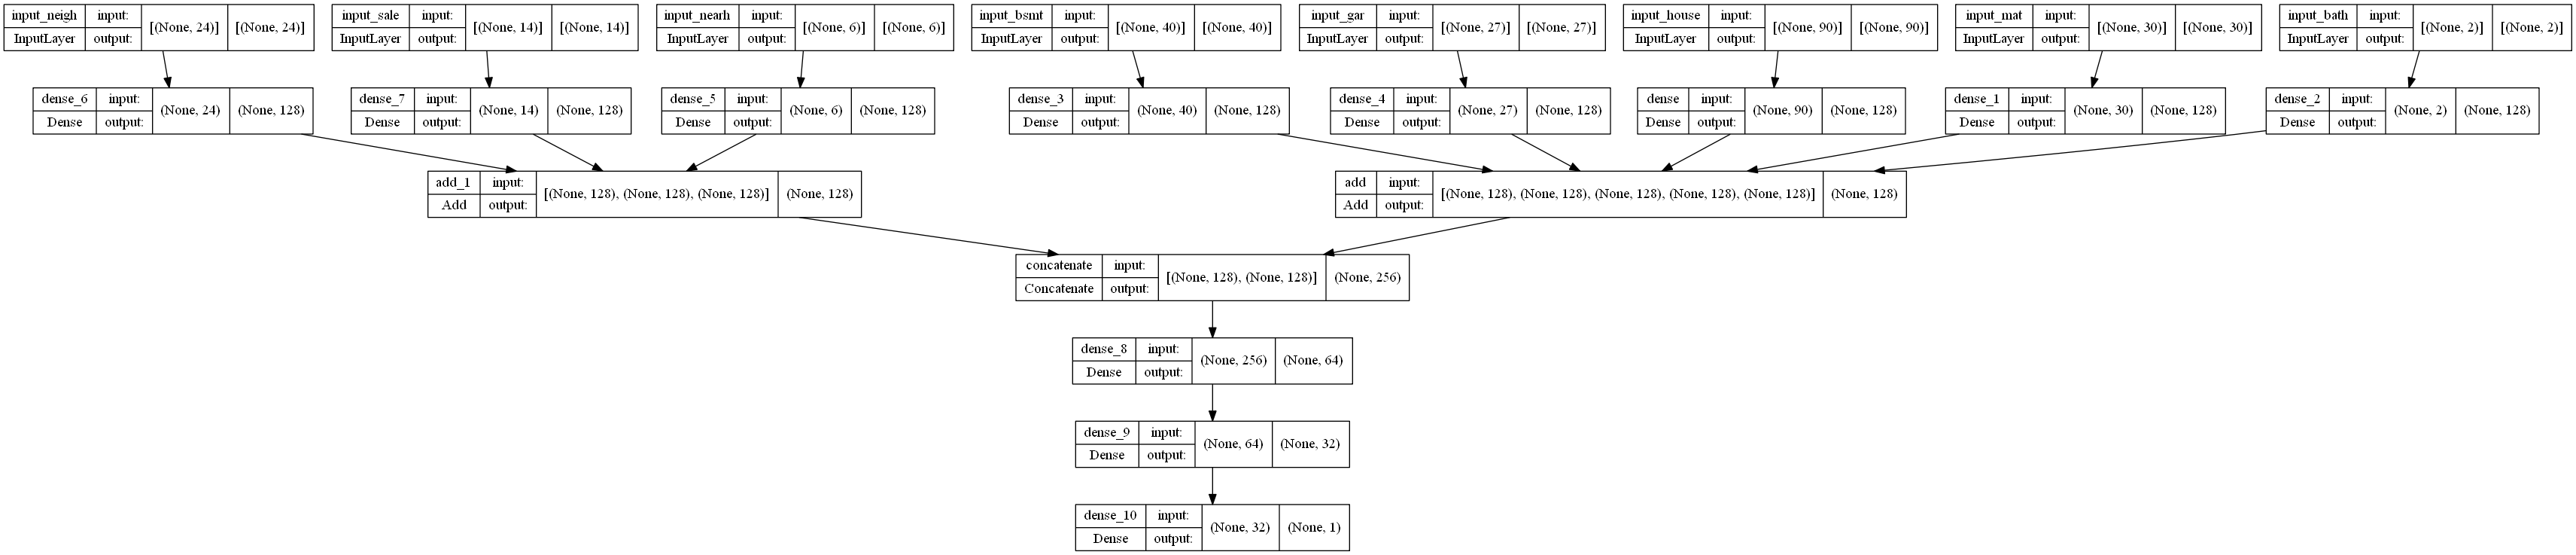

In [514]:
plot_model(dl5, show_shapes=True, show_layer_names=True)

In [515]:
# dl5 학습하기
dl5.fit([tr_x_house,tr_x_mat,tr_x_bath,tr_x_bsmt,tr_x_gar,tr_x_nearh,tr_x_neigh,tr_x_sale],
        y_train, validation_split=0.3, epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
21/21 [==============================] - 2s 47ms/step - loss: 15071344640.0000 - val_loss: 3516184576.0000
Epoch 2/1000
21/21 [==============================] - 0s 5ms/step - loss: 3648910336.0000 - val_loss: 2178579712.0000
Epoch 3/1000
21/21 [==============================] - 0s 5ms/step - loss: 1778965248.0000 - val_loss: 1610354944.0000
Epoch 4/1000
21/21 [==============================] - 0s 5ms/step - loss: 1780624256.0000 - val_loss: 1510690816.0000
Epoch 5/1000
21/21 [==============================] - 0s 6ms/step - loss: 1502488448.0000 - val_loss: 1349095680.0000
Epoch 6/1000
21/21 [==============================] - 0s 5ms/step - loss: 1630704384.0000 - val_loss: 1823944832.0000
Epoch 7/1000
21/21 [==============================] - 0s 5ms/step - loss: 1492098176.0000 - val_loss: 1391455104.0000
Epoch 8/1000
21/21 [==============================] - 0s 5ms/step - loss: 1371007872.0000 - val_loss: 1259606016.0000
Epoch 9/1000
21/21 [==============================] - 

21/21 [==============================] - 0s 5ms/step - loss: 586000512.0000 - val_loss: 689622528.0000
Epoch 71/1000
21/21 [==============================] - 0s 5ms/step - loss: 562139840.0000 - val_loss: 708065856.0000
Epoch 72/1000
21/21 [==============================] - 0s 4ms/step - loss: 544700928.0000 - val_loss: 742834624.0000
Epoch 73/1000
21/21 [==============================] - 0s 5ms/step - loss: 556673344.0000 - val_loss: 676597824.0000
Epoch 74/1000
21/21 [==============================] - 0s 6ms/step - loss: 546713024.0000 - val_loss: 776795008.0000
Epoch 75/1000
21/21 [==============================] - 0s 5ms/step - loss: 571780032.0000 - val_loss: 698096640.0000
Epoch 76/1000
21/21 [==============================] - 0s 6ms/step - loss: 574752384.0000 - val_loss: 703825344.0000
Epoch 77/1000
21/21 [==============================] - 0s 5ms/step - loss: 567455232.0000 - val_loss: 681955392.0000
Epoch 78/1000
21/21 [==============================] - 0s 5ms/step - loss: 665

In [516]:
# dl5 예측하기
dl5_pred=dl5.predict([val_x_house,val_x_mat,val_x_bath,val_x_bsmt,val_x_gar,val_x_nearh, val_x_neigh,val_x_sale])

In [517]:
# dl5 평가하기  
print('MSE:', mean_squared_error(y_val, dl5_pred))
print('R2-Score:', r2_score(y_val, dl5_pred))

MSE: 922200116.2542181
R2-Score: 0.887522117379085


In [518]:
# 결과저장
result_mse['dl5'] = mean_squared_error(y_val, dl5_pred)
result_r2['dl5'] = r2_score(y_val, dl5_pred)

# 모델 성능 비교 - MSE

In [519]:
models = []
mse = []

for k, v in result_mse.items():
    models.append(k)
    mse.append(v)

models = pd.DataFrame(models)
mse = pd.DataFrame(mse)

mse_df = pd.concat([models, mse], axis=1)
mse_df.columns = ['models', 'mse']

mse_df = mse_df.sort_values('mse', ascending=False)

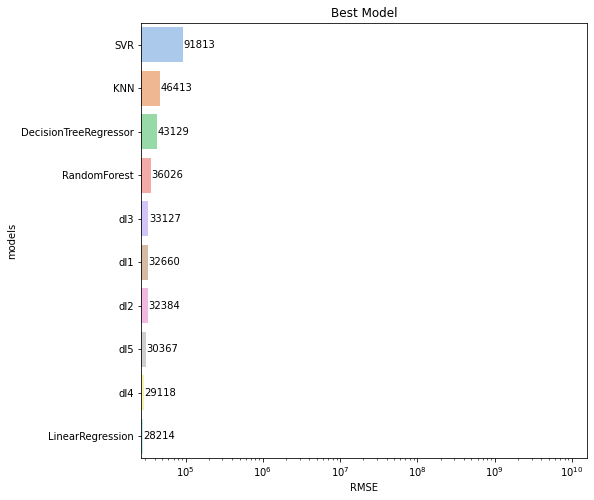

In [520]:
plt.figure(figsize=(8, 8))
plt.title('Best Model')
ax1 = sns.barplot(x=round((mse_df['mse']**0.5), 2), y=mse_df['models'], palette=sns.color_palette('pastel'))
plt.xlabel('RMSE')
plt.xscale('log')

for p in ax1.patches:
    x, y, width, height = p.get_bbox().bounds
    ax1.text(width*1.01, y+height/2, int(width), va='center')
ax1.set_xlim(0, 10**10.2)


plt.show()

In [522]:
models = []
r2 = []

for k, v in result_r2.items():
    models.append(k)
    r2.append(v)

models = pd.DataFrame(models)
r2 = pd.DataFrame(r2)

r2_df = pd.concat([models, r2], axis=1)
r2_df.columns = ['models', 'r2']

r2_df = r2_df.sort_values('r2', ascending=False)

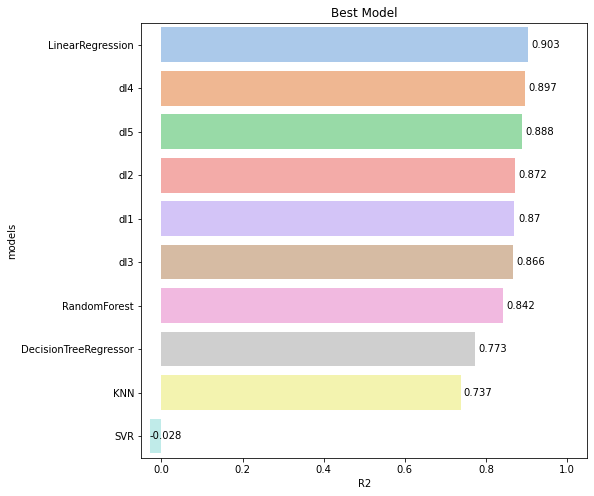

In [523]:
plt.figure(figsize=(8, 8))
plt.title('Best Model')
ax2 = sns.barplot(x=r2_df['r2'], y=r2_df['models'], palette=sns.color_palette('pastel'))
plt.xlabel('R2')
plt.xscale('linear')

for p in ax2.patches:
    x, y, width, height = p.get_bbox().bounds
    ax2.text(width*1.01, y+height/2, round(width, 3), va='center')
ax2.set_xlim(-0.05, 1.05)

plt.show()

## 일반적인 결정계수 기준
- 일반적으로 Bio는 0.95, 공학은 0.7, 사회과학은 0.3 정도를 기준으로 한다고 함.
- Cohen이라는 학자는 아래와 같이 효과크기에 따른 결정계수의 기준을 제시함
- 보통 사회과학에서는 이중 medium의 기준인 0.13 정도를 기준으로 함<br>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb3oLge%2FbtqYZ7tNapc%2FNOqOweFGuwYS1ivGpkoZcK%2Fimg.png'><br>
출처: https://ltlkodae.tistory.com/19<br>

# 데이터 파이프라인

## 오브젝트 저장

In [ ]:
data.to_csv('data.csv', index = False)

In [ ]:
import joblib

* 자료형 : imputer1_list, cat

In [ ]:
joblib.dump(imputer1_list, 'imputer1_list.pkl')
joblib.dump(cat, 'cat.pkl')

* fitting된 함수 : imputer1, imputer2, model

In [ ]:
joblib.dump(imputer1, 'preprocess/imputer1_ti1.pkl')
joblib.dump(imputer2, 'preprocess/imputer2_ti1.pkl')
joblib.dump(scaler, 'preprocess/scaler_ti1.pkl')
joblib.dump(model, 'model/model_ti1.pkl')

* 커널 재시작

In [119]:
# 함수생성
def titanic_fe(df):
    temp = df.copy()
    # Family 변수 추가
    temp['Family'] = temp['SibSp'] + temp['Parch'] + 1
    temp.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

    # OOO 추가...
    return temp

def titanic_dumm(df, cat):
    for k, v in cat.items():
        df[k] = pd.Categorical(df[k], categories=v, ordered=False)
    df = pd.get_dummies(df, columns =cat.keys(), drop_first = 1)
    return df

def titanic_datapipeline(df, simpleimputer, simple_impute_list, dumm_list, , scaler, knnimputer):

    temp = df.copy()

    # Feature Engineering
    temp = titanic_fe(temp)

    # NaN 조치① : SimpleImputer
    temp[simple_impute_list] = simpleimputer.fit_transform(temp[simple_impute_list])

    # 가변수화
    temp = titanic_dumm(temp, dumm_list)

    x_cols = list(temp)

    # 스케일링
    temp = scaler.transform(temp)

    # NaN 조치② : KNNImputer
    temp = knnimputer.transform(temp)

    return pd.DataFrame(temp, columns = x_cols)


SyntaxError: invalid syntax (<ipython-input-119-75b66c2c6bd5>, line 16)

## 오브젝트 불러오기

In [ ]:
imputer1_list = joblib.load('imputer1_list.pkl')
cat = joblib.load('cat.pkl')

imputer1 = joblib.load('preprocess/imputer1.pkl')
imputer2 = joblib.load('preprocess/imputer2.pkl')
scaler = joblib.load('preprocess/scaler.pkl')
model = joblib.load('model/model.pkl')